<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [2]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [3]:
# Initialize data dict:
sat_scores_dict = {
    "State": [],
    "Rate": [],
    "Verbal": [],
    "Math": []
}

# Use csv.DictReader(csvfile) method to map info in CSV to DictReader object:
# Sample row in DictReader -- {'Math': '510', 'State': 'CT', 'Rate': '82', 'Verbal': '509'}
for each_row in csv.DictReader(open("sat_scores.csv")):
    for variable in sat_scores_dict.keys():
        try:
            sat_scores_dict[variable].append(int(each_row[variable]))
        except:
            sat_scores_dict[variable].append(each_row[variable])

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
# Make a pandas DataFrame object with the SAT dictionary:
sat_dict_df = pd.DataFrame(sat_scores_dict)

# Show dtypes of df from dict:
print(sat_dict_df.dtypes)

# Make a pandas DataFrame object with the pandas .read_csv():
sat_df = pd.read_csv("sat_scores.csv")

# Show dtypes of df from reading csv directly:
print(sat_df.dtypes)

Math       int64
Rate       int64
State     object
Verbal     int64
dtype: object
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


<span style="color:blue">
The data types of the values in the DataFrames are the same, but only because I converted the numeric string values (the values in "Math", "Rate" and "Verbal") to integers when I created the SAT dictionary above. The order of the columns are different though, as the keys in dictionary were rearranged.
</span>

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [5]:
sat_df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [6]:
sat_df.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


<span style="color:blue">
Our data most likely describes the following --
-  State: The U.S. states where the students reside
-  Rate: The participation rates (the percentage of students from the states who sat for the SAT)
-  Verbal: The mean SAT Verbal scores of students from the states who sat for the SAT 
-  Math: The mean SAT Math scores of students from the states who sat for the SAT
</span>

In [7]:
# Should remove "All" row as might skew data:
sat_df = sat_df.iloc[:51, :]

# Check:
sat_df.tail()

,State,Rate,Verbal,Math
46,UT,5,575,570
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [8]:
# Initialize data dictionary:
data_dict = {
    "State": {},
    "Rate": {},
    "Verbal": {},
    "Math": {}
}

column_descriptions = {
    "State": "U.S. states where the SAT-taking students reside",
    "Rate": "SAT participation rates of state (%)",
    "Verbal": "Mean SAT Verbal scores of state",
    "Math": "Mean SAT Math scores of state"
}

# Add info to data dictionary:
for variable in data_dict.keys():
    data_dict[variable]["description"] = column_descriptions[variable]
    data_dict[variable]["type"] = sat_df[variable].dtype
    data_dict[variable]["rows"] = sat_df[variable].shape[0]

# Show data_dict as DataFrame:
pd.DataFrame(data_dict).transpose()

,description,rows,type
Math,Mean SAT Math scores of state,51,int64
Rate,SAT participation rates of state (%),51,int64
State,U.S. states where the SAT-taking students reside,51,object
Verbal,Mean SAT Verbal scores of state,51,int64


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

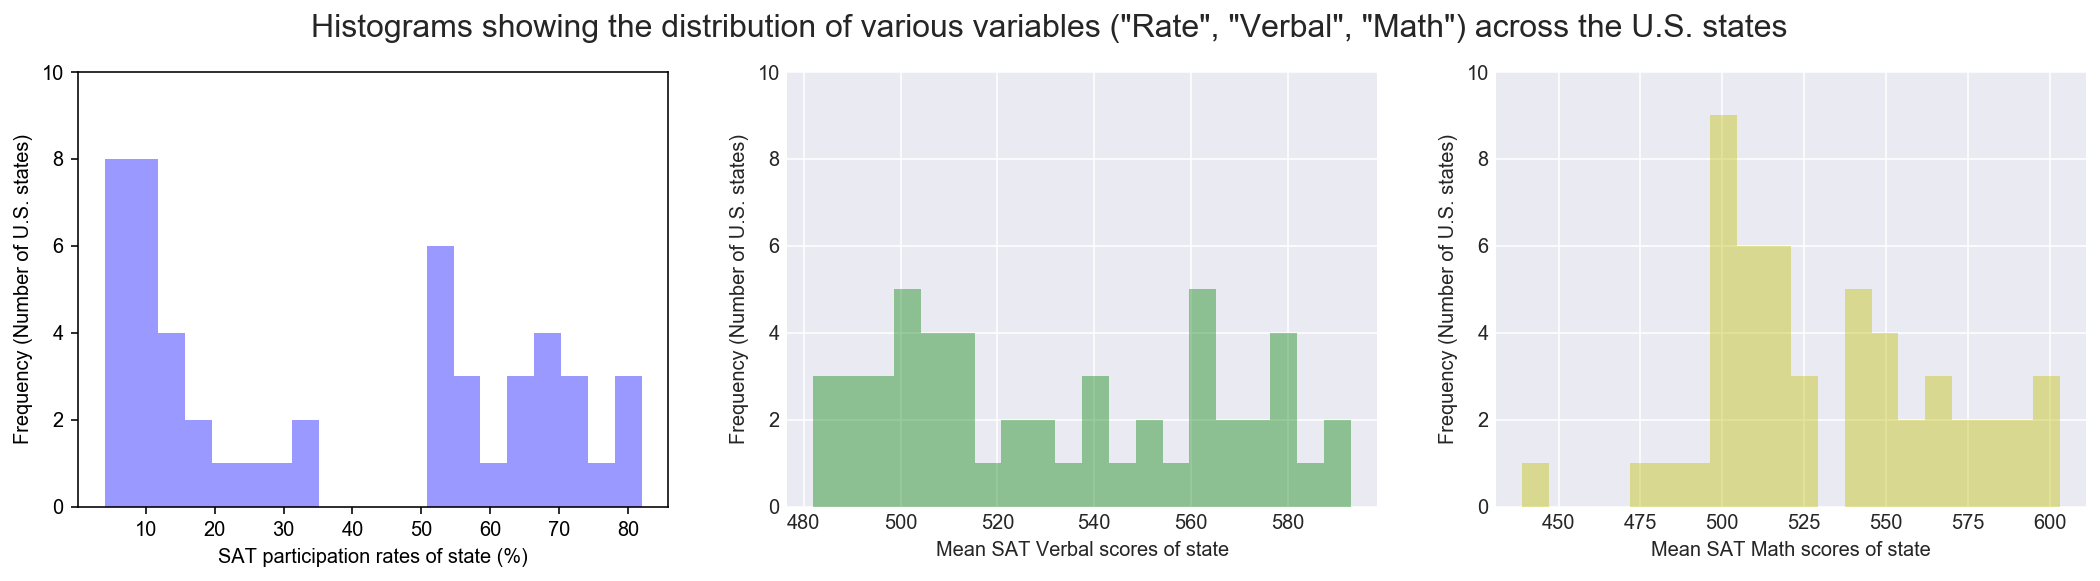

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

distplot_colors = ["b", "g", "y"]

def plot_hist(column_index):
    column_name = sat_df.columns[column_index]
    sns.set_style("darkgrid")
    sns.distplot(sat_df[column_name], kde=False, bins=20, axlabel=data_dict[column_name]["description"], color=distplot_colors[column_index - 1])

fig = plt.figure(figsize=(18, 4))

# Plot histograms in a row like in a "small multiple" to facilitate comparison:
for sp in range(3):
    sp_ax = fig.add_subplot(1, 3, sp + 1)
    plot_hist(sp + 1)
    plt.ylim(ymax=10) # Since plots are side-by-side, clearer if they share same y-axis scale 
    plt.ylabel("Frequency (Number of U.S. states)")

plt.suptitle("Histograms showing the distribution of various variables (\"Rate\", \"Verbal\", \"Math\") across the U.S. states", fontsize=16)

plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

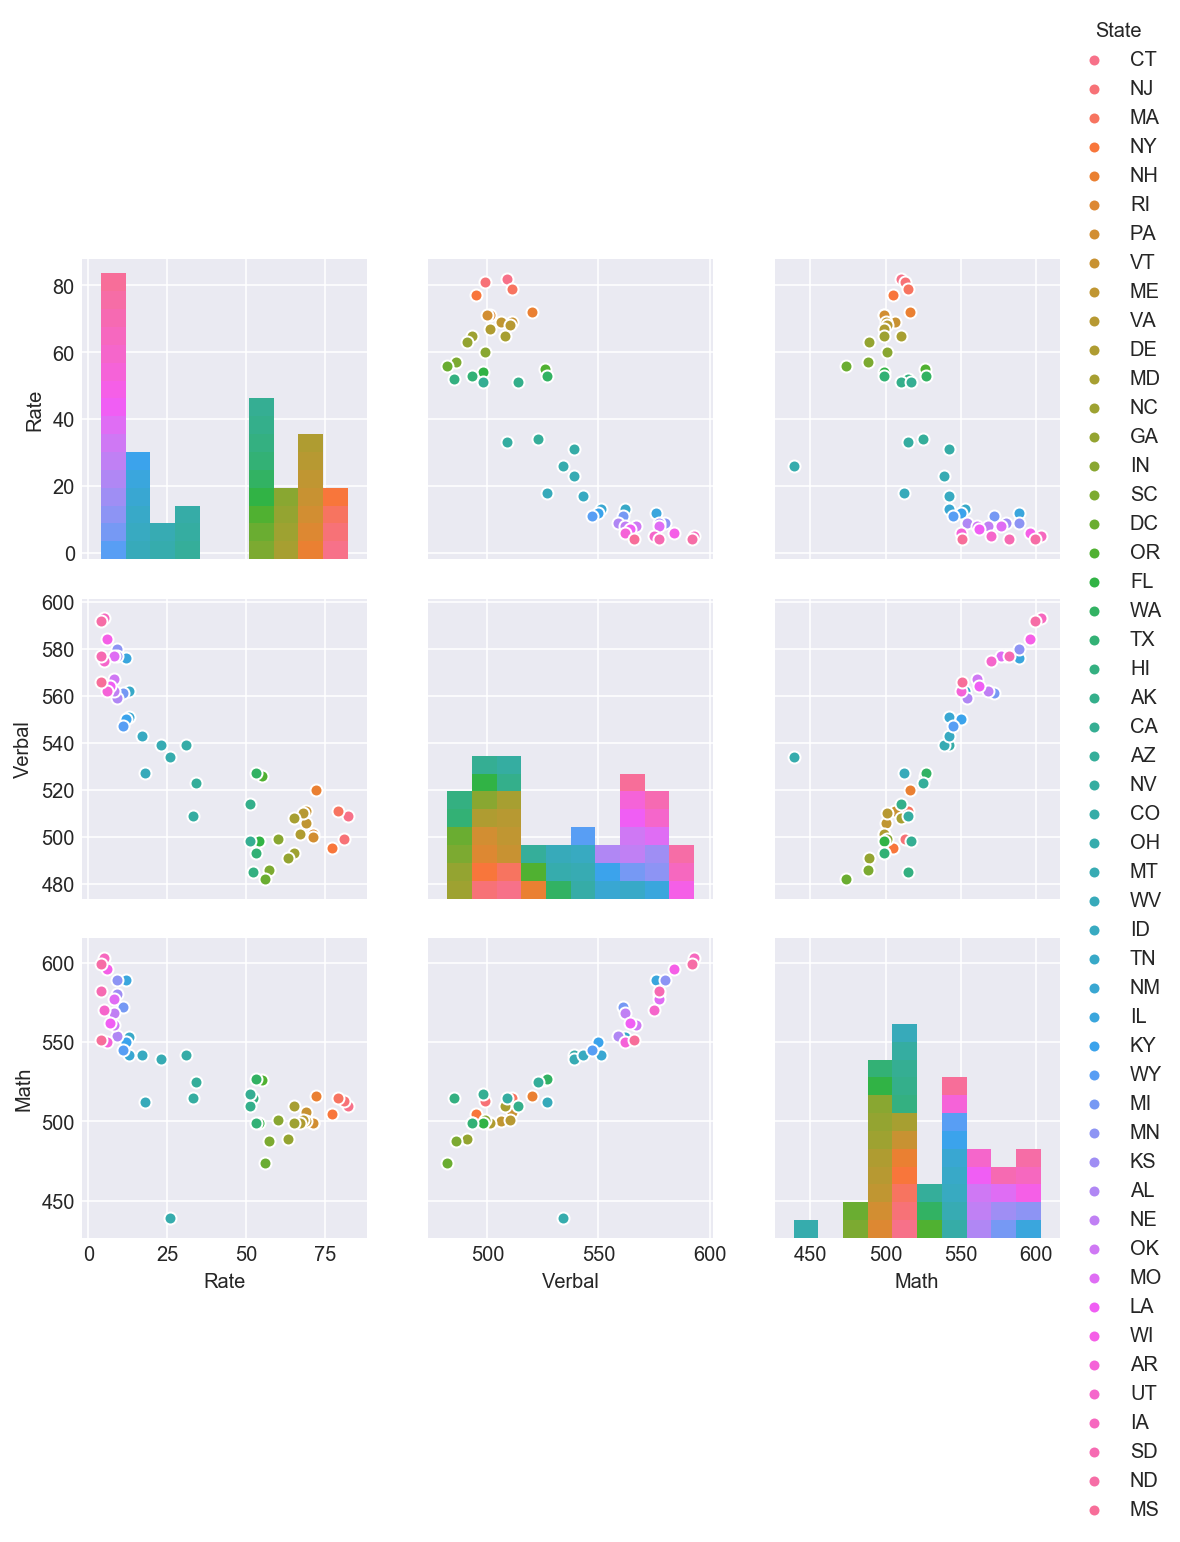

In [10]:
sns.pairplot(sat_df, hue="State")

<span style="color:blue">
Preliminary observations that bear further investigation:
-  "Rate" and "Verbal" appear to be negatively correlated.
    -  The higher the SAT participation rate, the lower the mean SAT Verbal score.
-  "Rate" and "Math" appear to be negatively correlated as well.
-  "Verbal" and "Math" appear to be positively correlated.     
    -  The higher the mean SAT Verbal score, the higher the mean SAT Math score.
-  There seems to be an outlying value in the "Math" column 
    - One state has a particularly low mean SAT Math score.
</span>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

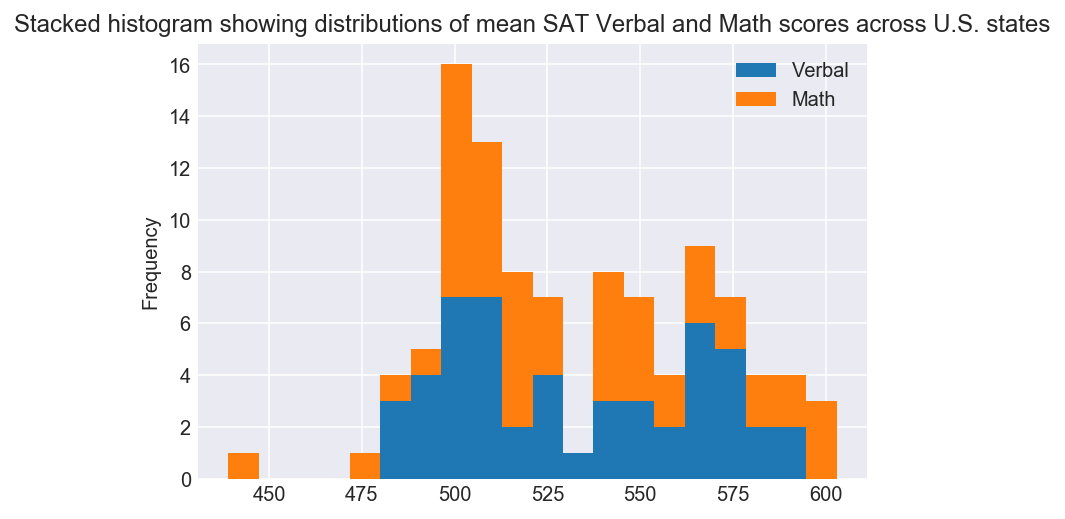

In [11]:
sat_df[["Verbal", "Math"]].plot.hist(stacked=True, bins=20)
plt.title("Stacked histogram showing distributions of mean SAT Verbal and Math scores across U.S. states")
plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

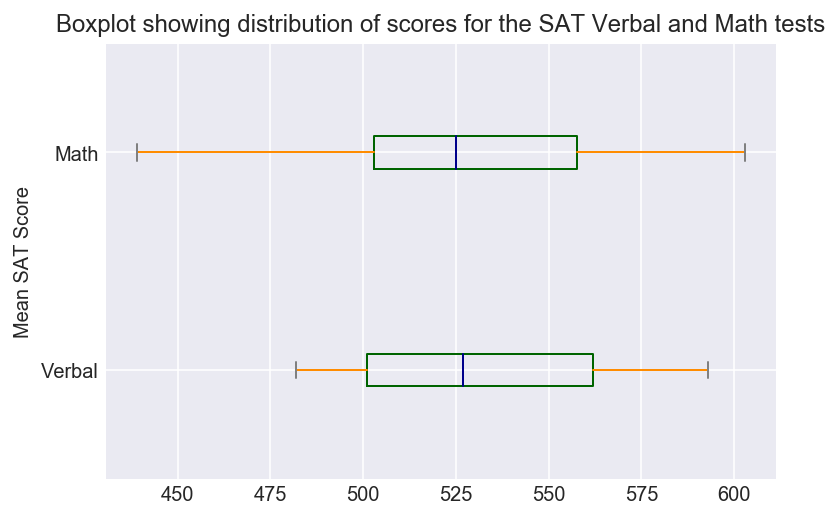

In [12]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
sat_df[["Verbal", "Math"]].plot.box(color=color, sym='r', vert=False) # Prefer using sns -- it's prettier
plt.ylabel("Mean SAT Score")
plt.title("Boxplot showing distribution of scores for the SAT Verbal and Math tests")
plt.show()

<span style="color:blue">
Benefits of boxplots:
-  Summarizes data using five key concepts (median, upper quartile, lower quartile, min and max) -- Allowing quick comparisons.
-  Clearly shows outliers (1.5 times the inter-quartile range).
-  (vs scatterplot) Provides indications of symmetry within the data

We shouldn't plot "Rate" on the same chart as it has a different y-axis (percentage instead of mean SAT score).
</span>

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


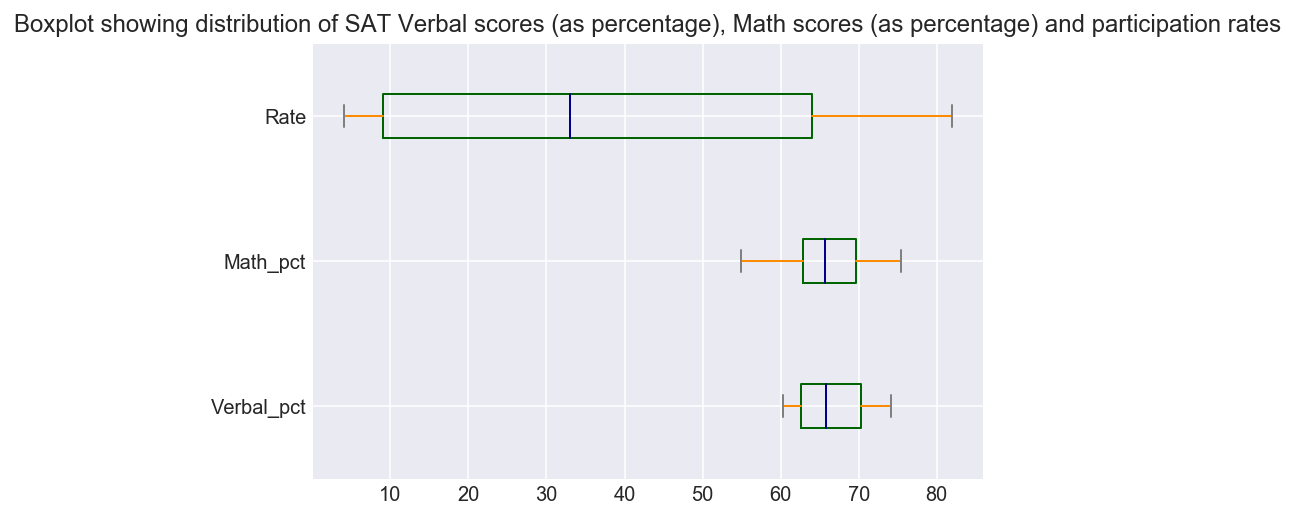

In [13]:
# Possible Change #1: Express the mean SAT score as a percentage of the highest total SAT score possible.
# This makes the y-values of all three variables a percentage, and so they can share a y-axis.
sat_df["Verbal_pct"] = (sat_df["Verbal"] / float(800)) * 100
sat_df["Math_pct"] = (sat_df["Math"] / float(800)) * 100

sat_df[["Verbal_pct", "Math_pct", "Rate"]].plot.box(color=color, sym='r', vert=False)
plt.title("Boxplot showing distribution of SAT Verbal scores (as percentage), Math scores (as percentage) and participation rates")
plt.show()

# Still not very intuitive for comparison -- see below for another way of plotting the variables appropriately on the same boxplot.

In [14]:
# Reload CSV such that the df does not have the new columns (didn't want to use .drop())
sat_df = pd.read_csv("sat_scores.csv")
sat_df = sat_df.iloc[:51, :]

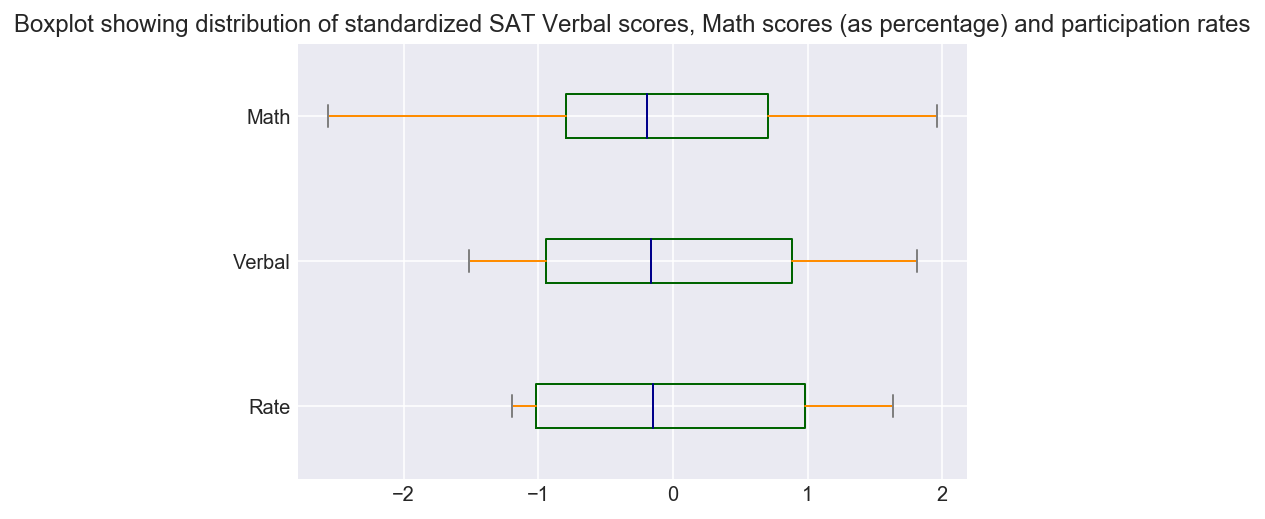

In [15]:
# Possible Change #2: Standardize the variables.
# This allows us to visualize and compare the distribution of data for the various variables.
std_sat_df = (sat_df[["Rate", "Verbal", "Math"]] - sat_df[["Rate", "Verbal", "Math"]].mean()) / sat_df[["Rate", "Verbal", "Math"]].std()

std_sat_df.plot.box(color=color, sym='r', vert=False)
plt.title("Boxplot showing distribution of standardized SAT Verbal scores, Math scores (as percentage) and participation rates")
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [16]:
print("Average mean Verbal score across states: {}".format(sat_df["Verbal"].mean()))

sat_df[sat_df["Verbal"] > sat_df["Verbal"].mean()]

num_above_mean = len(sat_df[sat_df["Verbal"] > sat_df["Verbal"].mean()]["State"])
print("{} out of 50 states have mean Verbal score above the average across states.".format(num_above_mean))


Average mean Verbal score across states: 532.529411765
24 out of 50 states have mean Verbal score above the average across states.


<span style="color:blue">
Since around half of the states are above average, the distribution of Verbal scores is not greatly skewed.
</span>

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [17]:
print("Median mean Verbal score across states: {}".format(sat_df["Verbal"].median()))

sat_df[sat_df["Verbal"] > sat_df["Verbal"].median()]

num_above_median = len(sat_df[sat_df["Verbal"] > sat_df["Verbal"].median()]["State"])
print("{} out of 50 states have mean Verbal score above the median across states.".format(num_above_median))

Median mean Verbal score across states: 527.0
24 out of 50 states have mean Verbal score above the median across states.


<span style="color:blue">
Compared to the mean of mean Verbal scores, the median is lower.
There are more states "above median" than "above average".
Since mean > median, the distribution of mean Verbal scores could be skewed slightly positive/to the right.
</span>

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [18]:
sat_df["Verbal_Math_diff"] = sat_df["Verbal"] - sat_df["Math"]

sat_df.head()

,State,Rate,Verbal,Math,Verbal_Math_diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [19]:
sat_df_one = sat_df.sort_values("Verbal_Math_diff", axis="index", ascending=False).iloc[0:10, :]
sat_df_two = sat_df.sort_values("Verbal_Math_diff", axis="index").iloc[0:10, :]

In [20]:
# Top 3 states with greatest positive gap between "Verbal" and "Math" ("Verbal" > "Math")
sat_df_one.head(3)

,State,Rate,Verbal,Math,Verbal_Math_diff
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [21]:
# Top 3 states with greatest negative gap between "Verbal" and "Math" ("Verbal" < "Math")
sat_df_two.head(3)

,State,Rate,Verbal,Math,Verbal_Math_diff
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [22]:
sat_df[["Rate", "Verbal", "Math"]].corr()

,Rate,Verbal,Math
Rate,1.000000,-0.888121,-0.773419
Verbal,-0.888121,1.000000,0.899909
Math,-0.773419,0.899909,1.000000


<span style="color:blue">
There are relatively high negative correlations between the state's SAT participation rate and the state's mean SAT Verbal score, as well as the state's mean SAT Math score.
-  The greater the percentage of students sitting for the SAT in a state, the lower the mean SAT scores for the state.

There is a relatively high positive correlation between the state's mean SAT Verbal score and its mean SAT Math score.
-  A state with students that do well on the SAT Verbal test tends to have students that also do well on the Math test.
</span>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [23]:
sat_df[["Rate", "Verbal", "Math"]].describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


<span style="color:blue">
What each of the rows indicate:
</span>
-  count: Number of values in the column
-  mean: The sum of the values in the column divided by column count
-  std: The standard deviation of values for the column -- an indicator of the spread of values
-  min: The minimum value in the column -- the lowest value
-  25%: The 25th percentile value -- the value that is higher than 25% of all values in the column
-  50%: The 50th percentile value, or the median value -- the value that is higher than half of all values
-  75%: The 75% percentile value -- the value that is higher than 75% of all values in the column
-  max: The maximum value in the column -- the highest value

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [24]:
sat_df[["Rate", "Verbal", "Math"]].cov()

,Rate,Verbal,Math
Rate,759.04,-816.280000,-773.220000
Verbal,-816.28,1112.934118,1089.404706
Math,-773.22,1089.404706,1316.774902


<span style="color:blue">
Covariance vs correlation:
</span>
1. Both the covariance and correlation are bivariate measures that show how one variable changes with another, and indicate whether the variables are positively or inversely related. However, the covariance uses the same scale and units as the variables, while the correlation is scaled between -1 and +1 and unit-free.

2. To convert covariance into the correlation, divide it by the product of the sample standard deviations of both variables.

3. It's easier to make sense of and compare the standardized values in the correlation matrix. The correlation coefficients help us more clearly understand the degree to which the two variable change together.This is especially since "Rate" has different units and scale from "Verbal" and "Math".

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [25]:
# Load data:
drug_df = pd.read_csv("drug-use-by-age.csv" )
drug_df.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [26]:
drug_df.tail()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [27]:
# Brief info on data columns:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

***
<span style="color:blue">
__JASMINE'S NOTES__
</span>

## First impressions of data:
- Data doesn't have many rows but has many columns 
    - Convert data from wide panel to long format?
-  Note: What columns represent:
    -  "*-use": Percentage of people in the age group who used * drug in the past 12 months.
    -  "*-frequency": Median number of times a user in the age group used * drug in the past 12 months.
- Some values in `age` column are a single year, while some are range:
    -  Add column with an age representing the age ranges?
- `pain-releiver` spelled wrongly
    -  Rename column?
- No null values, but inappropriate data types for some columns:
    -  Check and fix what's making the column dtype "object" instead of "float"?
- Note: Different age groups have different `n` (sample size)


## Possible ways of examining data:

-  By type of drug: e.g "Hard" drugs vs "soft drugs"
    -  Need to research and add info that gives drug a classification (feature engineering)?
-  By age group: Could use representative ages and/or generations
    -  Need to define and add info on generations?
-  Drug use (proxy for popularity/pervasiveness) vs drug frequency (proxy for addictiveness/dependence)
    - Split dataframe into two dataframes?


## Data cleaning and prep steps:

1. Rename `pain-releiver-use` and `pain-releiver-frequency` columns
2. Change relevant column dtype to float
3. Insert `rep_age` and `generation` columns
4. Split `drug_df` to `use_df` and `freq_df`
5. Convert dataframes "wide-to-long"
6. Insert `drug_schedule`, `drug_type`, `drug_social_harm`, `drug_dependence`, `drug_physical_harm` columns to converted dataframes
***

In [28]:
# 1. Rename `pain-releiver-use` and `pain-releiver-frequency` columns:
drug_df.rename(columns={
                        "pain-releiver-use": "pain-reliever-use",
                        "pain-releiver-frequency": "pain-reliever-frequency"
                        }, inplace=True)


# 2. Change relevant column dtype to float:

# 2a. What rows are making the "cocaine-frequency" columns objects instead of floats? 
# (Can also simply use observation because few rows.)
object_columns_list = ["cocaine-frequency", "crack-frequency", "heroin-frequency", "inhalant-frequency", "oxycontin-frequency", "meth-frequency"]
for each_column in object_columns_list:
    print(drug_df[~ drug_df[each_column].str.replace(".", "").str.isnumeric()][["age", each_column]])
    
# 2b. Replace "-" with NaN (can do so by reloading CSV with na_values='-' as argument):
drug_df.replace('-', np.nan, inplace=True)
drug_df.iloc[:,2:] = drug_df.iloc[:, 2:].astype(float)

# 2c. Check:
drug_df.dtypes

    age cocaine-frequency
16  65+                 -
    age crack-frequency
0    12               -
2    14               -
16  65+               -
  age heroin-frequency
1  13                -
    age inhalant-frequency
16  65+                  -
    age oxycontin-frequency
16  65+                   -
    age meth-frequency
0    12              -
16  65+              -


age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-reliever-use          float64
pain-reliever-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

In [29]:
# 3. Insert `rep_age` and `generation` columns:

# 3a. Create list of representative ages:
rep_ages_list = []
for age_group_str in drug_df["age"].values:
    try:
        rep_ages_list.append(float(age_group_str))
    except:
        if "-" in age_group_str:
            ages_list = age_group_str.split("-")
            rep_ages_list.append(np.mean([float(age) for age in ages_list]))
        elif "+" in age_group_str:
            rep_ages_list.append(float(age_group_str.replace("+", "")))

# 3b. Insert "rep_age" column to drug_df:
drug_df.insert(1, "rep_age", rep_ages_list)

# 3c. Create list of generations (according to Pew Research Center):
generations_list = []
for rep_age in drug_df["rep_age"].values:
    if round(rep_age) in range(0, 16):
        generations_list.append("Gen Z")
    elif round(rep_age) in range(16, 32):
        generations_list.append("Millennials")
    elif round(rep_age) in range(32, 48):
        generations_list.append("Gen X")
    elif round(rep_age) in range(48, 66):
        generations_list.append("Boomers")

# 3d. Insert "generation" column to drug_df:
drug_df.insert(2, "generation", generations_list)

# Check:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 30 columns):
age                        17 non-null object
rep_age                    17 non-null float64
generation                 17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-reliever-use          17 non-null float64
pain-rel

In [30]:
drug_df.head()

,age,rep_age,generation,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,12.0,Gen Z,2798,3.9,3.0,1.1,4.0,0.1,5.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,13.0,Gen Z,2757,8.5,6.0,3.4,15.0,0.1,1.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,14.0,Gen Z,2792,18.1,5.0,8.7,24.0,0.1,5.5,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,15.0,Gen Z,2956,29.2,6.0,14.5,25.0,0.5,4.0,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,16.0,Millennials,3058,40.1,10.0,22.5,30.0,1.0,7.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [31]:
# 4. Split `drug_df` to `use_df` and `freq_df`:

# 4a. Get indices for use and frequency columns:
freq_columns = [index for index in range(4, 30) if index % 2]
use_columns = [index for index in range(4, 30) if index % 2 == 0]

# 4b. Split drug_df by "*-use" and "*-frequency" columns:
freq_df = drug_df.iloc[:, :4].join(drug_df.iloc[:, freq_columns])
use_df = drug_df.iloc[:, :4].join(drug_df.iloc[:, use_columns])

# 4c. Check:
use_df.head()

,age,rep_age,generation,n,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-reliever-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12,12.0,Gen Z,2798,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,13.0,Gen Z,2757,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,14.0,Gen Z,2792,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,15.0,Gen Z,2956,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,16.0,Millennials,3058,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2


In [32]:
# 4c. Check:
freq_df.head()

,age,rep_age,generation,n,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-reliever-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
0,12,12.0,Gen Z,2798,3.0,4.0,5.0,NaN,35.5,52.0,19.0,36.0,24.5,52.0,2.0,NaN,13.0
1,13,13.0,Gen Z,2757,6.0,15.0,1.0,3.0,NaN,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
2,14,14.0,Gen Z,2792,5.0,24.0,5.5,NaN,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
3,15,15.0,Gen Z,2956,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
4,16,16.0,Millennials,3058,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0


In [33]:
# 5. Convert dataframes "wide-to-long"
long_use_df = pd.melt(use_df, id_vars=["age", "rep_age", "generation", "n"])
long_freq_df = pd.melt(freq_df, id_vars=["age", "rep_age", "generation", "n"])
long_use_df

,age,rep_age,generation,n,variable,value
0,12,12.0,Gen Z,2798,alcohol-use,3.9
1,13,13.0,Gen Z,2757,alcohol-use,8.5
2,14,14.0,Gen Z,2792,alcohol-use,18.1
3,15,15.0,Gen Z,2956,alcohol-use,29.2
4,16,16.0,Millennials,3058,alcohol-use,40.1
5,17,17.0,Millennials,3038,alcohol-use,49.3
6,18,18.0,Millennials,2469,alcohol-use,58.7
7,19,19.0,Millennials,2223,alcohol-use,64.6
8,20,20.0,Millennials,2271,alcohol-use,69.7
9,21,21.0,Millennials,2354,alcohol-use,83.2


In [34]:
# 6. Insert `drug_schedule`, `drug_type`, `drug_social_harm`, `drug_dependence`, `drug_physical_harm` columns to converted dataframes:

# 6a. Create dictionaries of drug classifications:
drug_class_dict = {
    "alcohol": {
        "schedule": "III and below",
        "type": "Depressant",
        "dependence": 1.93,
        "social_harm": 2.21,
        "physical_harm": 1.40
    },
    "marijuana": {
        "schedule": "I",
        "type": "Hallucinogen",
        "dependence": 1.50,
        "social_harm": 2.21,
        "physical_harm": 0.99
    },
    "cocaine": {
        "schedule": "II",
        "type": "Stimulant",
        "dependence": 2.39,
        "social_harm": 2.17,
        "physical_harm": 2.33
    },
    "crack": {
        "schedule": "II",
        "type": "Stimulant",
        "dependence": 2.39,
        "social_harm": 2.17,
        "physical_harm": 2.33
    },
    "heroin": {
        "schedule": "I",
        "type": "Opiate",
        "dependence": 3.00,
        "social_harm": 2.54,
        "physical_harm": 2.78
    },
    "hallucinogen": {
        "schedule": "I",
        "type": "Hallucinogen",
        "dependence": 1.23,
        "social_harm": 1.32,
        "physical_harm": 1.13
    },
    "inhalant": {
        "schedule": "III and below",
        "type": "Hallucinogen",
        "dependence": 0.87,
        "social_harm": 0.97,
        "physical_harm": 0.93
    },
    "pain-reliever": {
        "schedule": "III and below",
        "type": "Opiate",
        "dependence": 1.64,
        "social_harm": 1.49,
        "physical_harm": 1.60
    },
    "oxycontin": {
        "schedule": "II",
        "type": "Opiate",
        "dependence": 2.08,
        "social_harm": 1.87,
        "physical_harm": 1.86
    },
    "tranquilizer": {
        "schedule": "III and below",
        "type": "Depressant",
        "dependence": 1.83,
        "social_harm": 1.65,
        "physical_harm": 1.63
    },
    "stimulant": {
        "schedule": "III and below",
        "type": "Stimulant",
        "dependence": 1.13,
        "social_harm": 1.09,
        "physical_harm": 1.05
    },
    "meth": {
        "schedule": "II",
        "type": "Stimulant",
        "dependence": 1.30,
        "social_harm": 1.06,
        "physical_harm": 1.44
    },
    "sedative": {
        "schedule": "III and below",
        "type": "Stimulant",
        "dependence": 2.01,
        "social_harm": 2.00,
        "physical_harm": 2.23
    }
}

# 6b. Create series for the various drug classifications:
schedules_list = []
types_list = []
dependence_list = []
social_harm_list = []
physical_harm_list = []

for drug in long_use_df["variable"].values:
    specific_drug_dict = drug_class_dict[drug[:-4]]
    for key, value in specific_drug_dict.items():
        if key == "schedule":
            schedules_list.append(value)
        elif key == "type":
            types_list.append(value)
        elif key == "dependence":
            dependence_list.append(value)
        elif key == "social_harm":
            social_harm_list.append(value)
        elif key == "physical_harm":
            physical_harm_list.append(value)

schedules_series = pd.Series(schedules_list, name="drug_schedule")
types_series = pd.Series(types_list, name="drug_type")
dependence_series = pd.Series(dependence_list, name="drug_dependence")
social_harm_series = pd.Series(social_harm_list, name="social_harm")
physical_harm_series = pd.Series(physical_harm_list, name="physical_harm")
            

# 6c. Insert drug classification columns to `long_use_df` and `long_freq_df`:
long_use_df = pd.concat([long_use_df, schedules_series], axis=1)
long_use_df = pd.concat([long_use_df, types_series], axis=1)
long_use_df = pd.concat([long_use_df, dependence_series], axis=1)
long_use_df = pd.concat([long_use_df, social_harm_series], axis=1)
long_use_df = pd.concat([long_use_df, physical_harm_series], axis=1)

long_freq_df = pd.concat([long_freq_df, schedules_series], axis=1)
long_freq_df = pd.concat([long_freq_df, types_series], axis=1)
long_freq_df = pd.concat([long_freq_df, dependence_series], axis=1)
long_freq_df = pd.concat([long_freq_df, social_harm_series], axis=1)
long_freq_df = pd.concat([long_freq_df, physical_harm_series], axis=1)


# 6d. Check:
long_freq_df.head()

,age,rep_age,generation,n,variable,value,drug_schedule,drug_type,drug_dependence,social_harm,physical_harm
0,12,12.0,Gen Z,2798,alcohol-frequency,3.0,III and below,Depressant,1.93,2.21,1.4
1,13,13.0,Gen Z,2757,alcohol-frequency,6.0,III and below,Depressant,1.93,2.21,1.4
2,14,14.0,Gen Z,2792,alcohol-frequency,5.0,III and below,Depressant,1.93,2.21,1.4
3,15,15.0,Gen Z,2956,alcohol-frequency,6.0,III and below,Depressant,1.93,2.21,1.4
4,16,16.0,Millennials,3058,alcohol-frequency,10.0,III and below,Depressant,1.93,2.21,1.4


In [35]:
#6d. Check:
long_freq_df.tail()

,age,rep_age,generation,n,variable,value,drug_schedule,drug_type,drug_dependence,social_harm,physical_harm
216,26-29,27.5,Millennials,2628,sedative-frequency,4.0,III and below,Stimulant,2.01,2.0,2.23
217,30-34,32.0,Gen X,2864,sedative-frequency,10.0,III and below,Stimulant,2.01,2.0,2.23
218,35-49,42.0,Gen X,7391,sedative-frequency,10.0,III and below,Stimulant,2.01,2.0,2.23
219,50-64,57.0,Boomers,3923,sedative-frequency,104.0,III and below,Stimulant,2.01,2.0,2.23
220,65+,65.0,Boomers,2448,sedative-frequency,15.0,III and below,Stimulant,2.01,2.0,2.23


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

***
<span style="color:blue">
__JASMINE'S NOTES__
</span>

## EDA Ideas:
### Possible univariate visualizations:
1. Boxplot of summary "*-use" for all age groups
    -  Amongst all age groups, which drugs have the highest median use percentage (i.e. are most pervasive/popular)?
    -  Amongst all age groups, which drugs have the largest range in use percentage (i.e. have the largest variation in use amongst age groups)?
    -  Amongst all age groups, which drugs have outlying use percentages (i.e. are extremely popular only in certain age groups)?

2. Boxplot of summary "*-frequency" for all age groups"
    -  Amongst all age groups, which drugs have the highest median use frequency (i.e. are probably most addictive)?
    -  Amongst all age groups, which drugs have the largest range in use frequency (i.e. are probably used for different functions/in different contexts)?
    -  Amongst all age groups, which drugs have outlying use percentages (i.e. are extremely addictive for addicts)?

3. Bar charts of mean "*-use" amongst all age groups of __grouped by drug classifications__
    -  Amongst all age groups, does the drug classification affect how popular/pervasive the drug is ?

4. Grouped bar chart (or small multiple) of "*-use" across different generations
    - What is the drug of choice (most popular drug) for each generation?
    - Which age groups are the key users of each drug (i.e. what is the main demographic for each drug)?
    
5. Grouped bar chart (or small multiple) of "*-use" __grouped by drug classifications__ across different generations
    - What classes of drug are the most popular for each generation?
    - Which age groups are the key users of each drug class (i.e. what is the main demographic for each drug class)?    

6. Grouped bar charts of "*-use" __grouped by drug classifications__ across __ages__
    - At which age groups do different drug types peak?

7. Bar charts of "*-freq" at different ages for the various drugs
    -  Which age groups of drug users have the highest levels of addiction?

8. Grouped bar charts of "*-freq" __grouped by generations__ across different levels in a drug classifications
    - Does the drug classification affect how frequently users are using the drug? 
 
    
### Possible bi- and multivariate visualizations:
10. Scatterplot and correlation matrix of "*-use" vs "*-freq" for the various drugs
    - Is there a relationship between a drug's pervasiveness/popularity and addictiveness?
11. Heatmap for "*-use"
12. Clustermap for "*-freq"
13. Scatterplots and correlation matrices of "*-use" vs "social_harm", "physical_harm" and "dependence"
    - Is there a relationship between a drug's pervasiveness/popularity and its level of harm and dependence?
14. Scatterplots and correlation matrices of "*-freq" vs "social_harm", "physical_harm" and "dependence"
    - Is there a relationship between how frequently a drug is used and its level of harm and dependence?
***

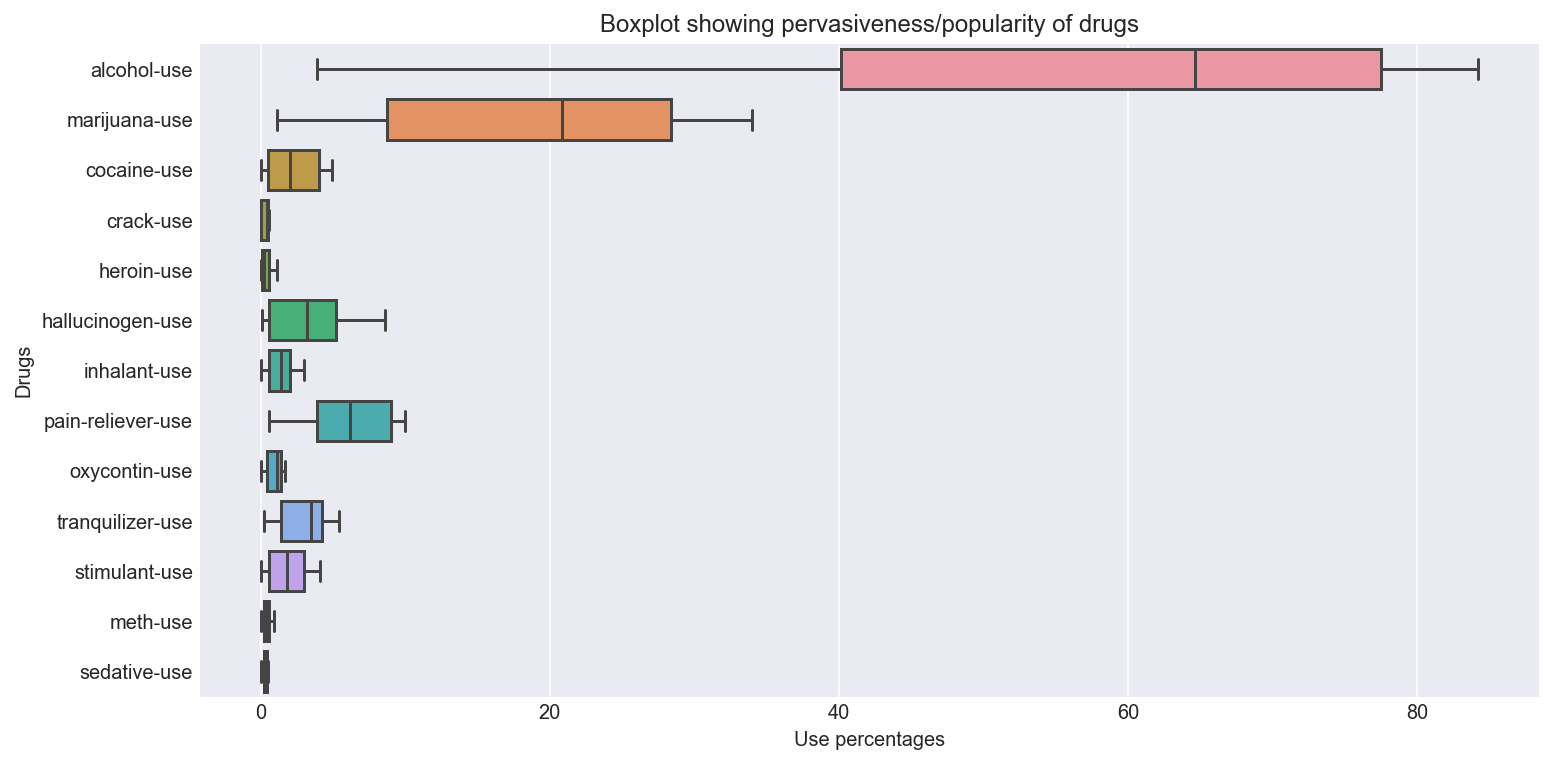

In [36]:
# 1. Boxplot of summary "*-use" for all age groups
#     -  Amongst all age groups, which drugs have the highest median use percentage (i.e. are most pervasive/popular)?
#     -  Amongst all age groups, which drugs have the largest range in use percentage (i.e. have the largest variation in use amongst age groups)?
#     -  Amongst all age groups, which drugs have outlying use percentages (i.e. are extremely popular only in certain age groups)?

# Use `use_df` as data

plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.boxplot(data=use_df.iloc[:, 4:], orient="h")

plt.title('Boxplot showing pervasiveness/popularity of drugs')
plt.xlabel('Use percentages')
plt.ylabel('Drugs')
plt.show()

<span style="color:blue">
Findings #1:
-  Alcohol, then marijuana are by far the most popular/pervasive drugs
    -  Should I consider them as outliers and remove them from other visualizations?
-  Next most popular drugs: Pain relievers, tranquizers then hallucinogens
-  Alcohol and marijuana also have largest ranges in percentage use
- Drugs with next largest ranges: Hallucinogens, cocaine, then pain relievers
    - Could be popular/less popular only in certain age groups
</span>

In [37]:
# Create dataframes without alcohol and marijuana:

use_df_no_am = use_df.drop(["alcohol-use", "marijuana-use"], axis="columns")

long_use_no_am = long_use_df[(long_use_df["variable"] != "alcohol-use") & (long_use_df["variable"] != "marijuana-use")]

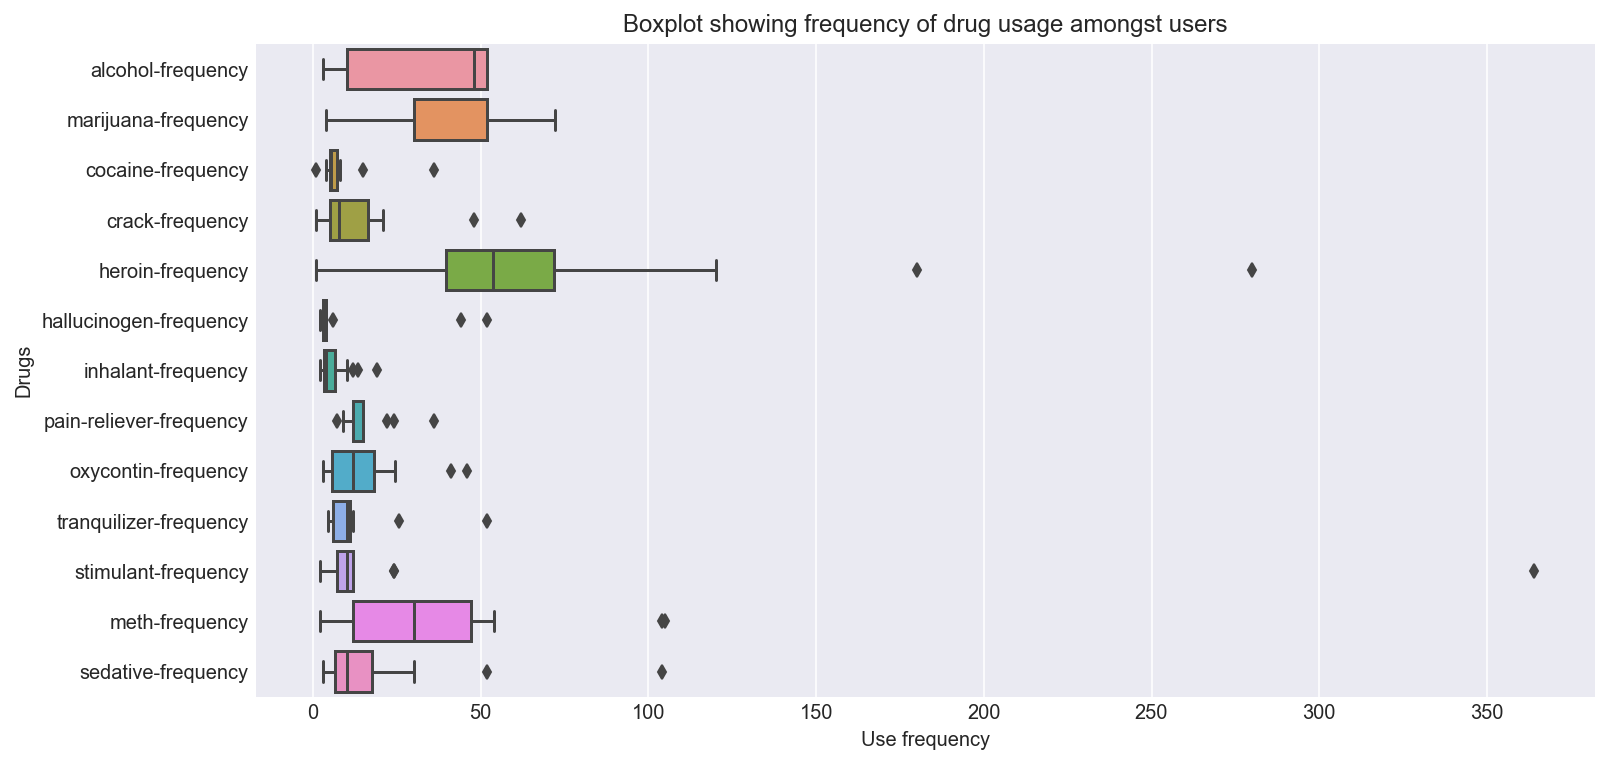

In [38]:
# 2. Boxplot of summary "*-frequency" for all age groups"
#     -  Amongst all age groups, which drugs have the highest median use frequency (i.e. are probably most addictive)?
#     -  Amongst all age groups, which drugs have the largest range in use frequency (i.e. are probably used for different functions/in different contexts)?
#     -  Amongst all age groups, which drugs have outlying use percentages (i.e. are extremely addictive for addicts)?

# Use `freq_df` as data

plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.boxplot(data=freq_df.iloc[:, 4:], orient="h")
plt.title('Boxplot showing frequency of drug usage amongst users')
plt.xlabel('Use frequency')
plt.ylabel('Drugs')
plt.show()

<span style="color:blue">
Findings #2:
-  Heroin, alcohol, marijuana, then meth are used with the highest frequency
    - Most addictive?
-  The same drugs also have largest ranges in use frequency
    - Makes sense for alcohol and marijuana as they are “soft” drugs wither users from a wide spectrum of use levels: Party/social users vs hardcore addicts
- Almost all drugs (except alcohol and marijuana) have outlying use percentages
    - All drugs can be highly addictive for addicts?
</span>

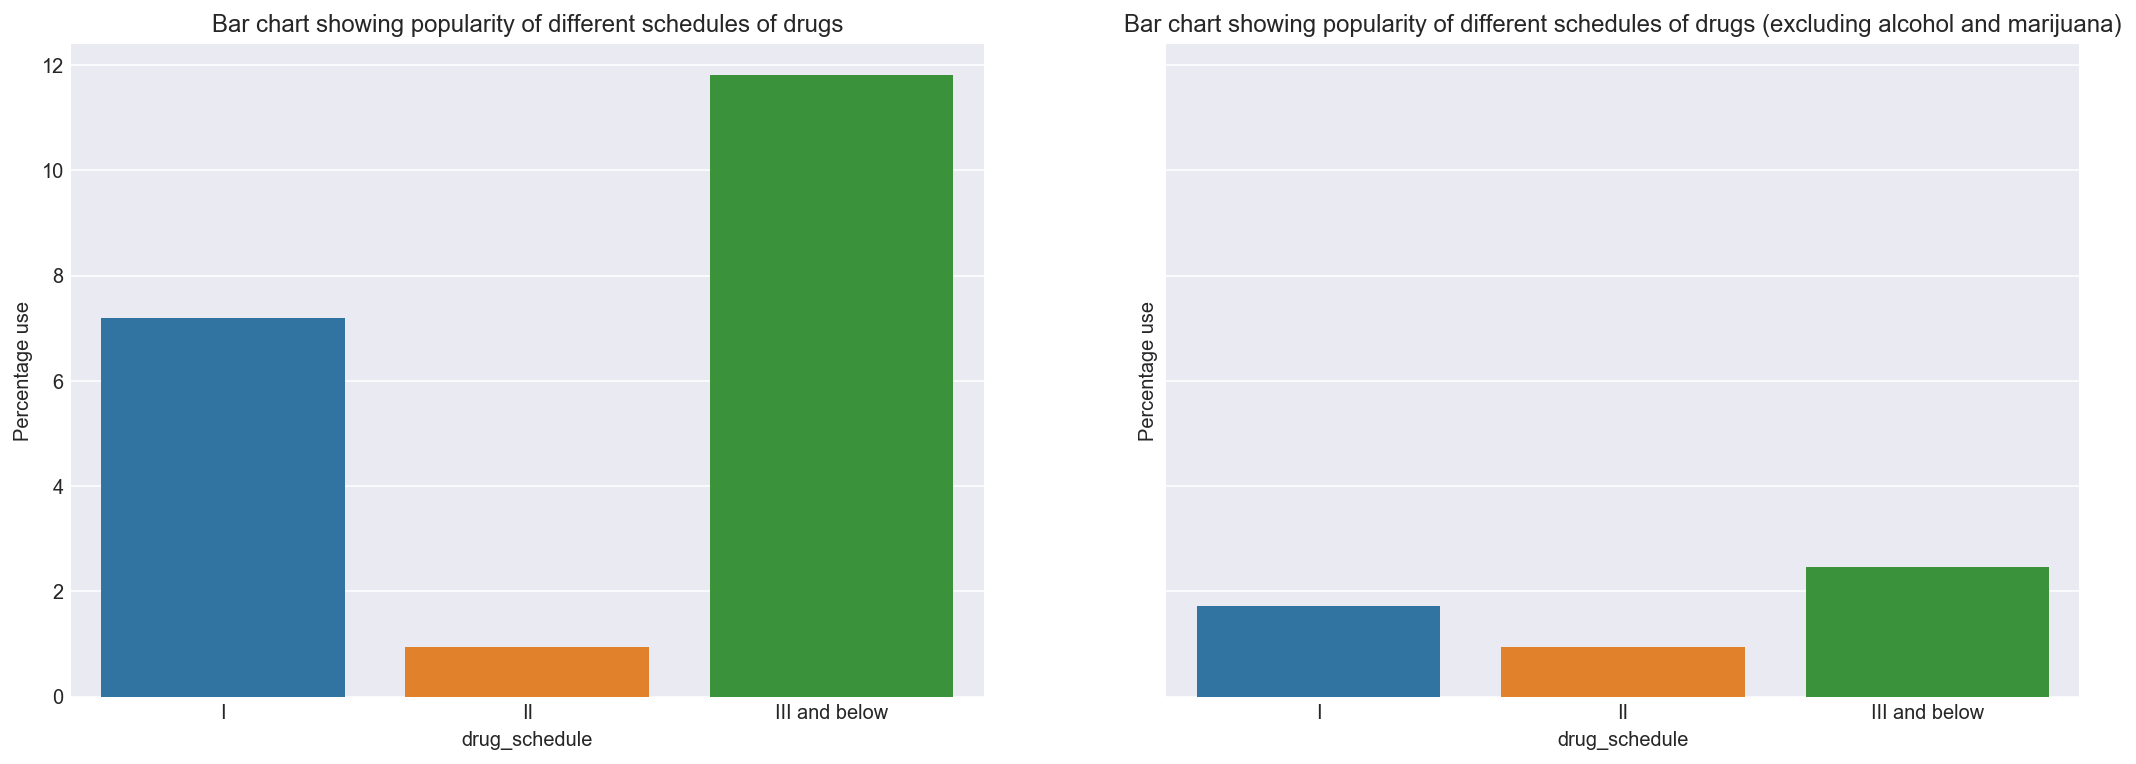

In [117]:
# 3. Bar charts of mean "*-use" amongst all age groups of __grouped by drug classifications__
#     -  Does the drug classification affect how popular/pervasive the drug is amongst all age groups?

# 3a. Group `long_use_df` by drug classifications and find adjusted use percentage value:

def group_long_df(long_df, groups_list):
    total_series = pd.Series(long_df["n"] * long_df["value"], name="n*value")
    total_use_df = pd.concat([long_df, total_series], axis=1) 
    grouped_sum_df = total_use_df.groupby(groups_list).sum().iloc[:, :7]
    grouped_df = grouped_sum_df["n*value"] / grouped_sum_df["n"]
    return grouped_df.reset_index().rename(columns={0: "value"})


# 3b. Plot bar chart for different drug schedules:

use_by_schedule = group_long_df(long_use_df, ["drug_schedule"])

fig, ax = plt.subplots(figsize=(18,6), ncols=2, nrows=1, sharey=True)

sns.barplot(x="drug_schedule", y="value", data=use_by_schedule, ax=ax[0])
ax[0].set_title('Bar chart showing popularity of different schedules of drugs')
ax[0].set_ylabel('Percentage use')

# 3c. Plot bar chart for different drug schedules with data excluding alochol and marijuana values:

use_by_schedule_no_am = group_long_df(long_use_no_am, ["drug_schedule"])

sns.barplot(x="drug_schedule", y="value", data=use_by_schedule_no_am, ax=ax[1])
ax[1].set_title('Bar chart showing popularity of different schedules of drugs (excluding alcohol and marijuana)')
ax[1].set_ylabel('Percentage use')

plt.show()

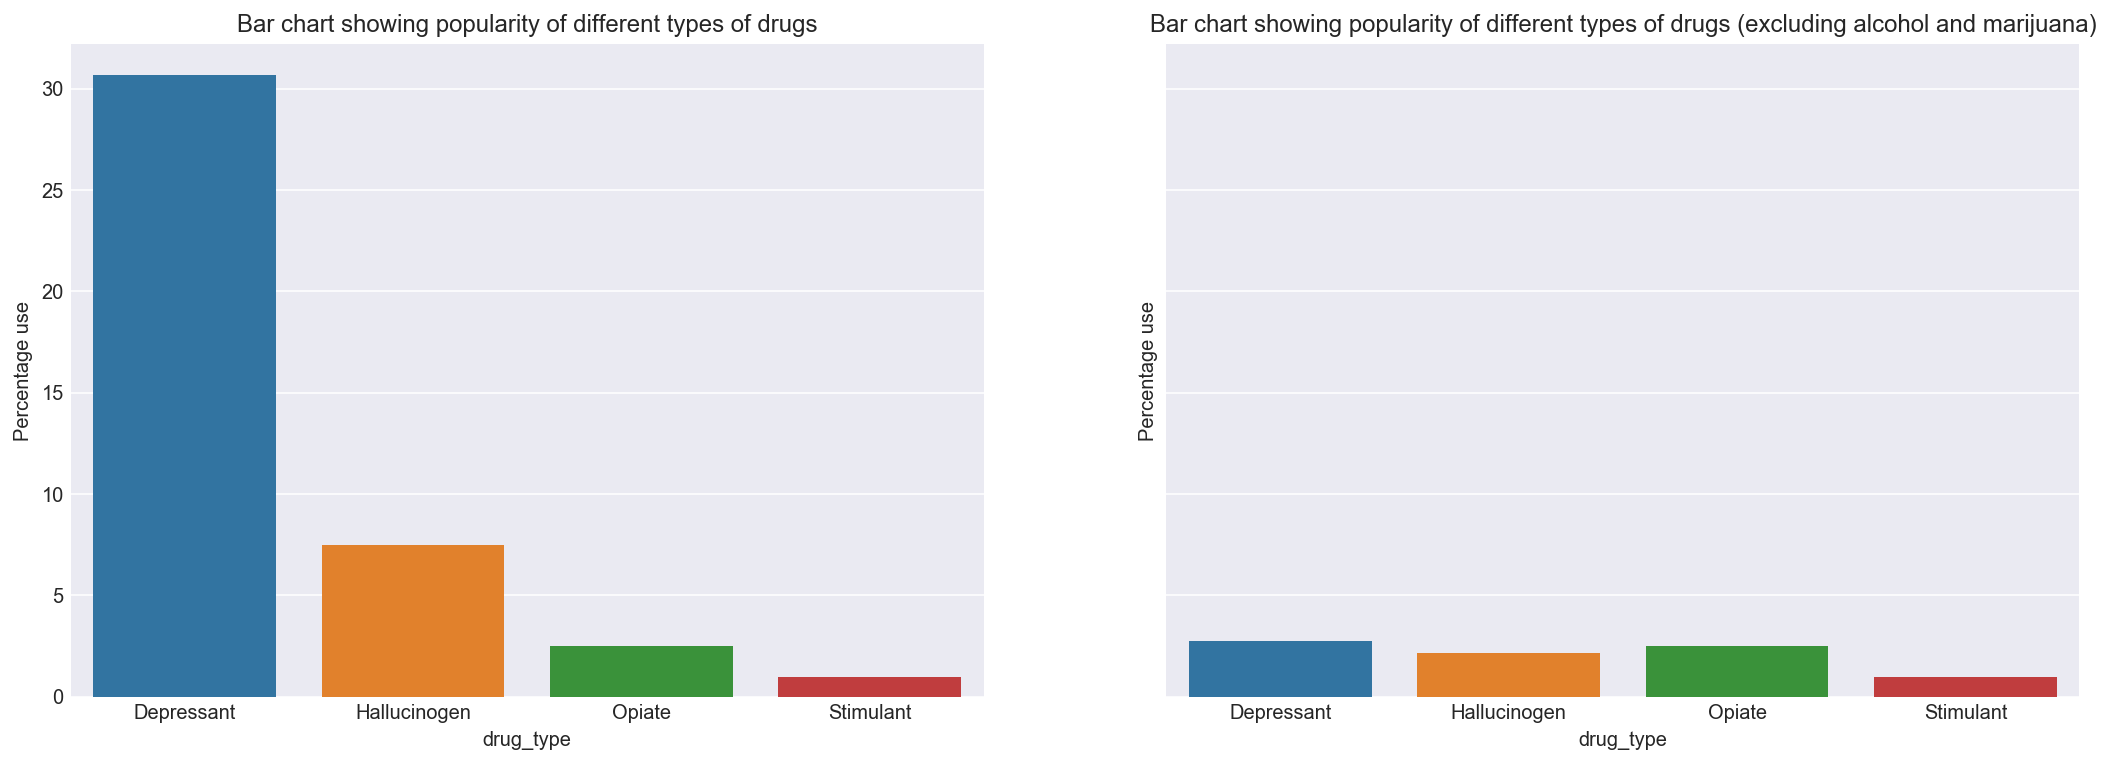

In [120]:
# 3d. Plot bar chart for different drug types:

use_by_type = group_long_df(long_use_df, ["drug_type"])

fig, ax = plt.subplots(figsize=(18,6), ncols=2, nrows=1, sharey=True)

sns.barplot(x="drug_type", y="value", data=use_by_type, ax=ax[0])
ax[0].set_title('Bar chart showing popularity of different types of drugs')
ax[0].set_ylabel('Percentage use')

# 3e. Plot bar chart for different drug types with data excluding alochol and marijuana values:

use_by_type_no_am = group_long_df(long_use_no_am, ["drug_type"])

sns.barplot(x="drug_type", y="value", data=use_by_type_no_am, ax=ax[1])
ax[1].set_title('Bar chart showing popularity of different types of drugs (excluding alcohol and marijuana)')
ax[1].set_ylabel('Percentage use')

plt.show()

<span style="color:blue">
Findings #3:
-  There doesn't seem to be a relationship between harshness of the drug schedule classification and drug popularity.
-  There isn't a drug type that is greatly more popular than others when data on alcohol (a depressant) and marijuana (a hallucinogen) is excluded.
</span>

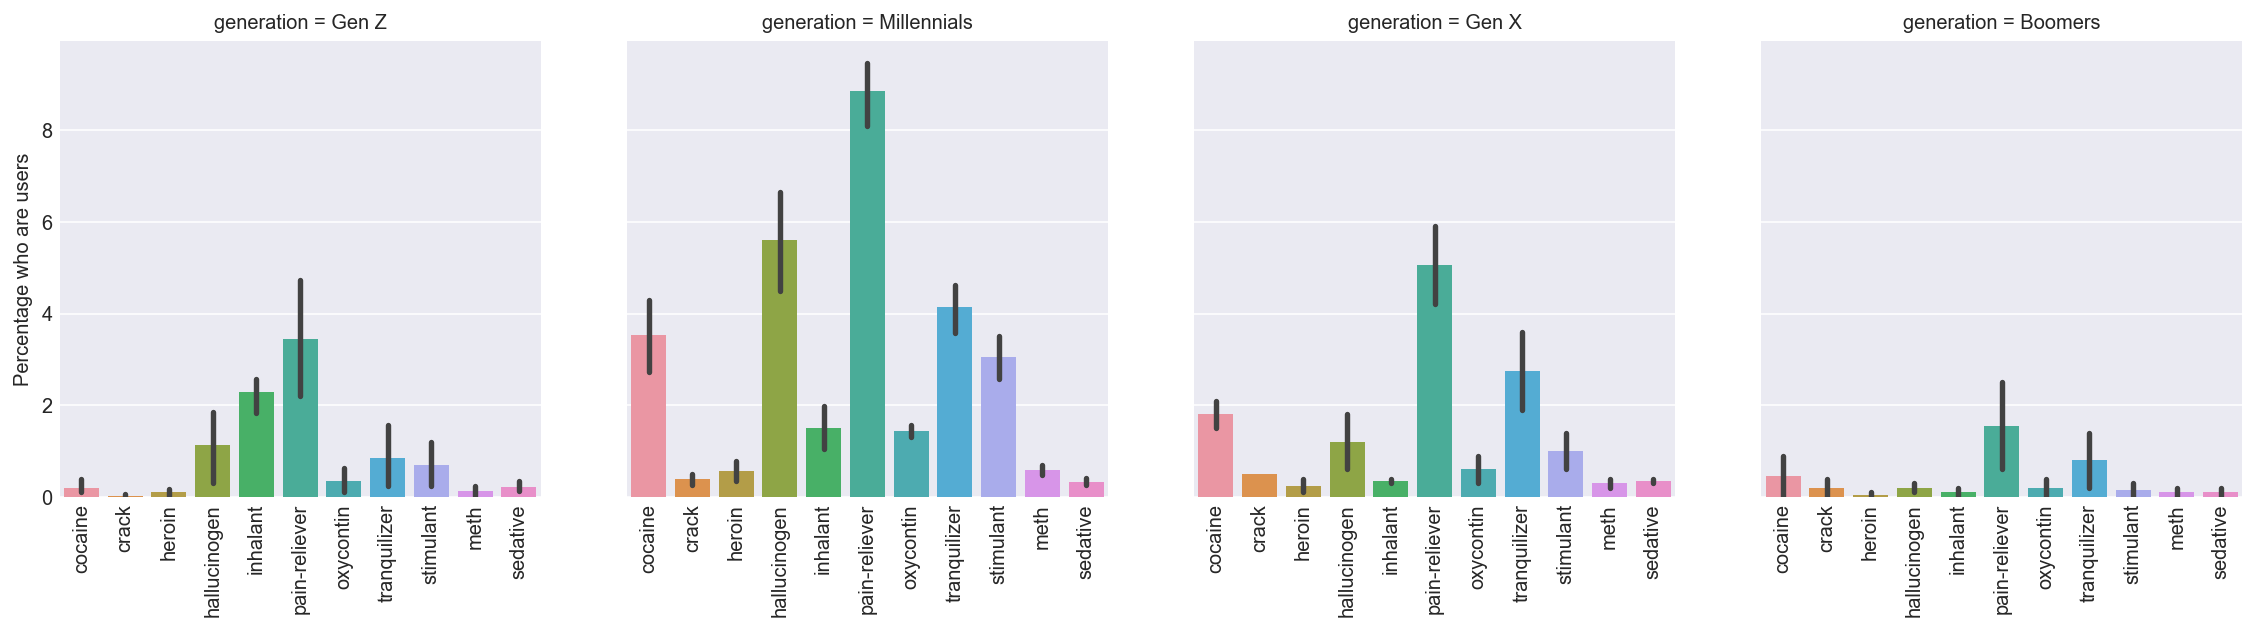

In [43]:
# 4. Grouped bar chart (or small multiple) of "*-use" across different generations
#     - What is the drug of choice (most popular drug) for each generation?
#     - Which age groups are the key users of each drug (i.e. what is the main demographic for each drug)?

# Use `use_df_no_am` as data
# Exlude data for alcohol and marijuana as they are outlying

g = sns.factorplot(x="variable", y="value", col="generation", data=long_use_no_am, kind="bar")
drugs_no_am = [drug[:-4] for drug in use_df_no_am.columns[4:]]
g.set_axis_labels("", "Percentage who are users").set_xticklabels(drugs_no_am, rotation=90)
plt.show()

<span style="color:blue">
Findings #4:
-  For Gen Z, the most popular drugs are pain relievers, inhalants and hallucinogens.
    - Inhalants are not popular amongst other generations.
-  Millenials, Gen X and Boomers have similar drug use patterns (relative drug popularity) -- the difference lies in the volume of drug use.
- Millenials have the consistently highest percentage use of all drugs (except inhalants).
    - Millenials are the majority/key users/main demographic for each drug except inhalants.
-  As mentioned above in Findings #1, the drug of choice (apart from alcohol and marijuana) are pain relievers, hallucinogens, and tranquilizers.
</span>

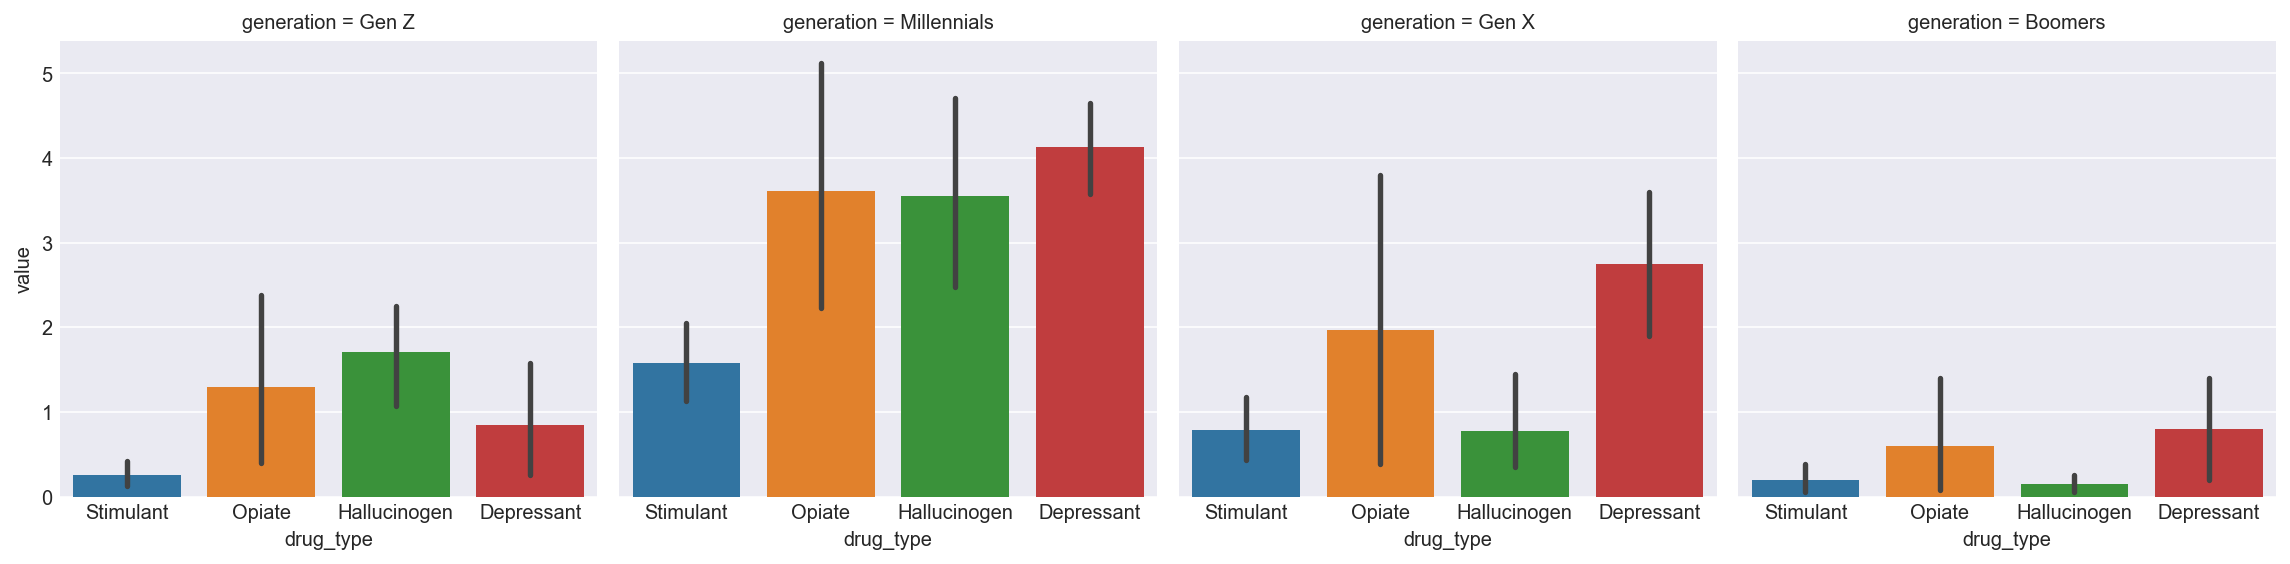

In [44]:
# 5. Grouped bar chart (or small multiple) of "*-use" __grouped by drug classifications__ across different generations
#     - What classes of drug are the most popular for each generation?
#     - Which age groups are the key users of each drug class (i.e. what is the main demographic for each drug class)? 
    
g = sns.factorplot(x="drug_type", y="value", col="generation", data=long_use_no_am, kind="bar")

<span style="color:blue">
Findings #5:
-  For Gen Z, the most popular drug type is hallucinogens, followed by opiates, then depressants.
- For Millenials, the most popular drug type is depressants, followed by hallucinogens, then opiates.
-  Gen X and Boomers have similar __drug type__ use patterns -- the difference lies in the volume of drug use.
    - The most popular drug type is depressants, followed by opiates.
    - Hallucinogens are the least popular.
- This suggests that Gen Z's drug choices/attitudes deviate from the other generations.
- Once again, Millenials have the consistently highest percentage use of all __drug types__.
    - Millenials are the majority/key users/main demographic for each __drug type__.
</span>

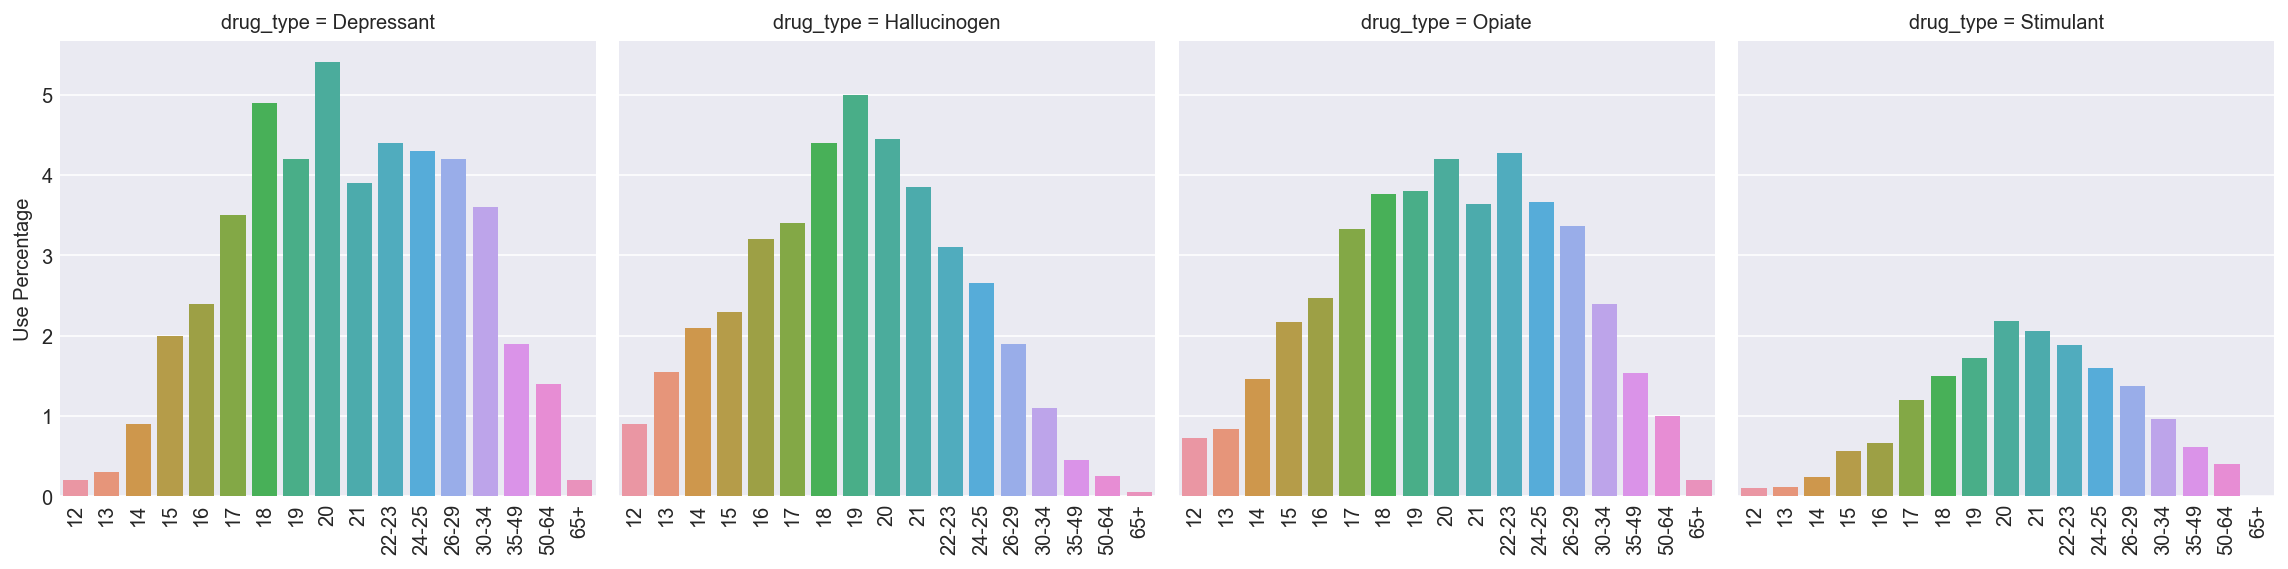

In [45]:
# 6. Grouped bar charts of "*-use" __grouped by drug classifications__ across __ages__
#     - At which age groups do different drug types peak?

use_by_age_type_no_am = group_long_df(long_use_no_am, ["age", "drug_type"])
g = sns.factorplot(x="age", y="value", col="drug_type", data=use_by_age_type_no_am, kind="bar")
g.set_axis_labels("", "Use Percentage").set_xticklabels(rotation=90)
plt.show()

<span style="color:blue">
Findings #6:
- Depressant and hallucinogen use peaks in late teens
- Opiate use peaks in early to late 20s
- Stimulant use peaks in early 20s
</span>

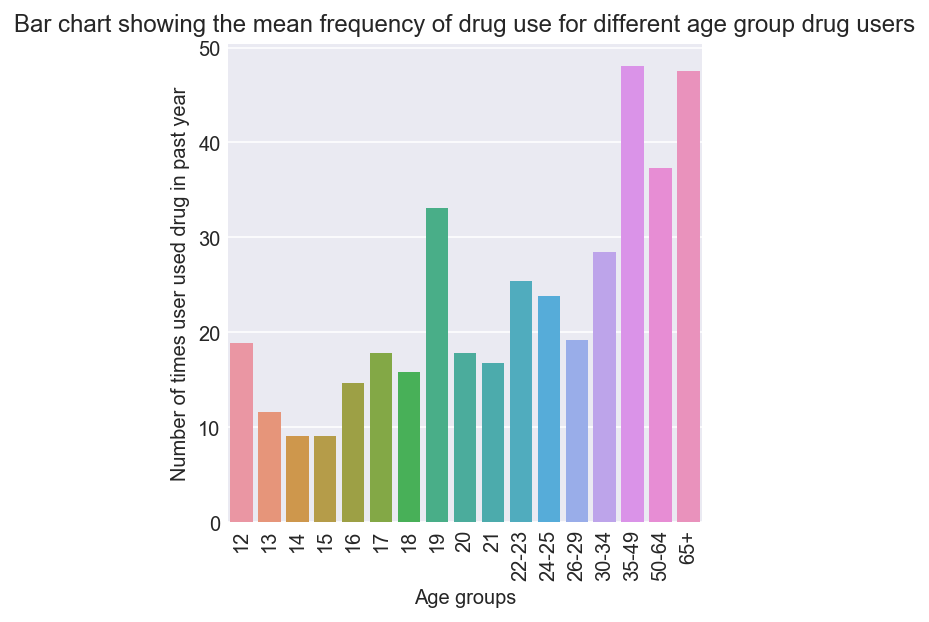

In [46]:
freq_by_age = group_long_df(long_freq_df, ["age"])
g = sns.factorplot(x="age", y="value", data=freq_by_age, kind="bar")
g.set_axis_labels("", "Number of times user used drug in past year").set_xticklabels(rotation=90)

plt.title('Bar chart showing the mean frequency of drug use for different age group drug users')
plt.xlabel('Age groups')
plt.show()

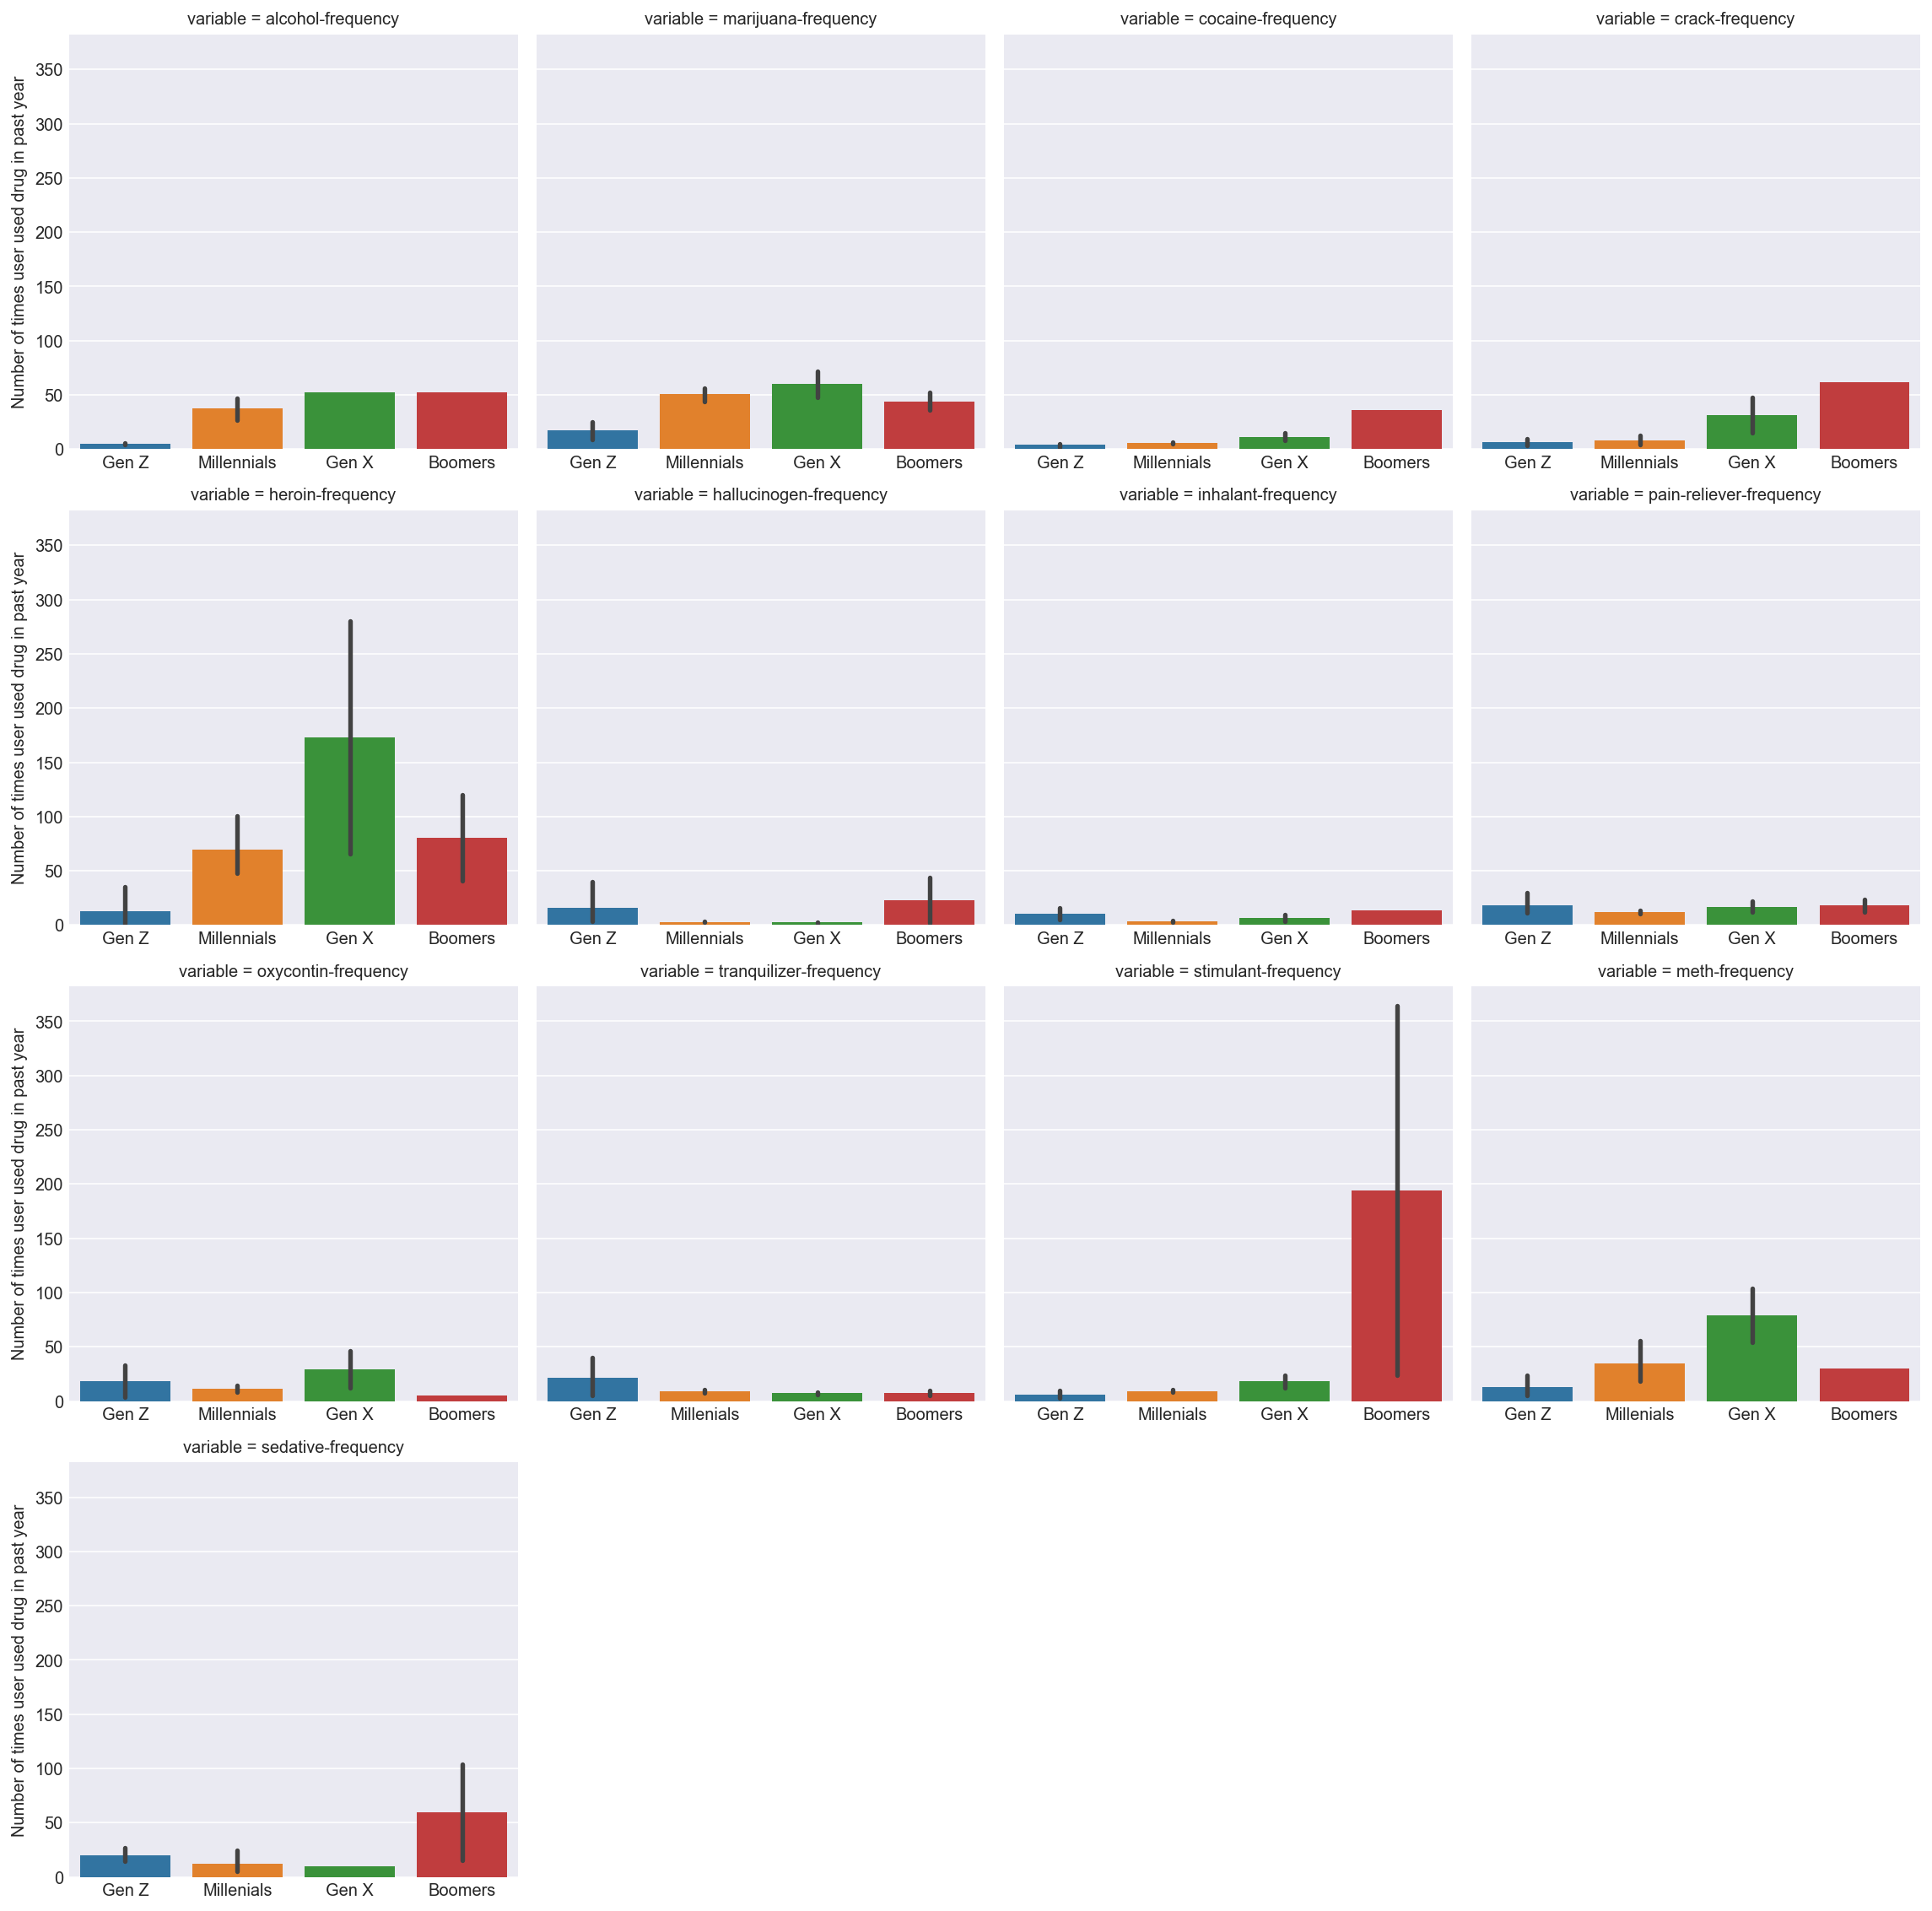

In [47]:
#  7. Bar charts of "*-freq" at different ages for the various drugs
#     -  Which age groups of drug users have the highest levels of addiction?

# Use `long_freq_df` as data

g = sns.factorplot(x="generation", y="value", col="variable", data=long_freq_df, kind="bar", col_wrap=4, sharex=False)
generations = ["Gen Z", "Millenials", "Gen X", "Boomers"]
g.set_axis_labels("", "Number of times user used drug in past year").set_xticklabels(generations)
plt.show()

<span style="color:blue">
Findings #7:
-  Older age groups generally use drugs more frequently
    - Have a higher level of addiction? Able to afford a high drug use frequency lifestyle?
-  In particular, Gen X users use heroin (and meth) at a much higher frequency than other generations.
-  Boomer users use stimulants (and sedatives) at a much higher frequency than other generations.
</span>

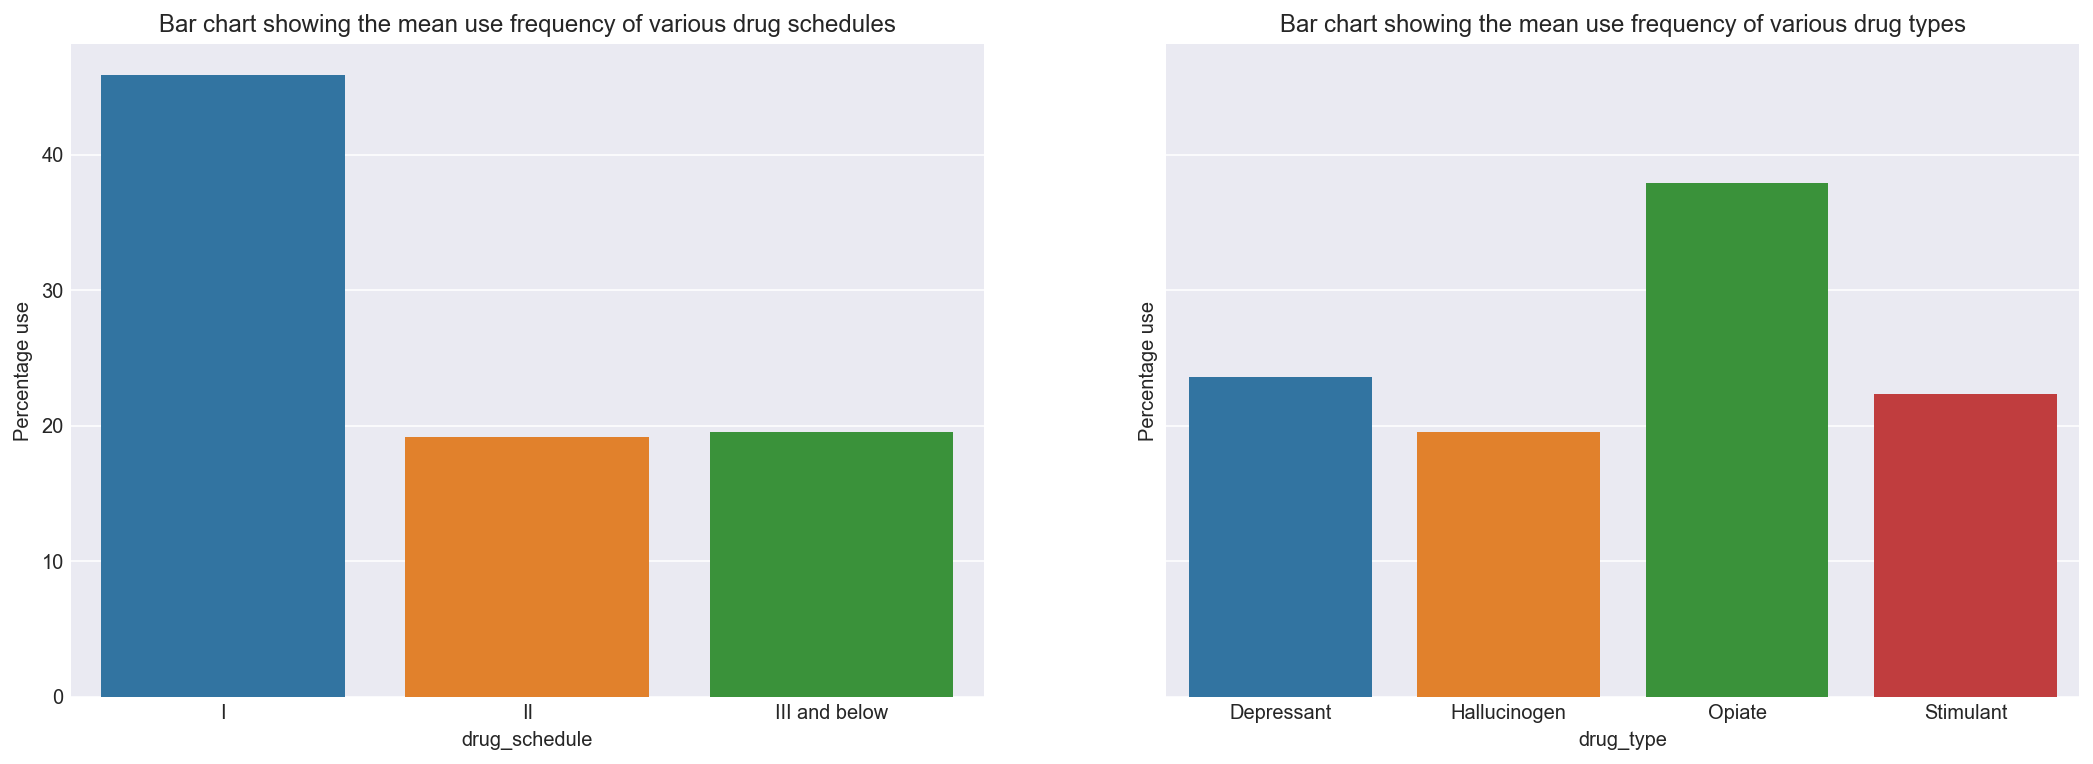

In [122]:
# 8. Grouped bar charts of "*-freq" __grouped by generations__ across different levels in a drug classifications
#     - Does the drug classification affect how frequently users are using the drug? 

# 8a. Plot bar chart for different drug schedules:

freq_by_schedule = group_long_df(long_freq_df, ["drug_schedule"])

fig, ax = plt.subplots(figsize=(18,6), ncols=2, nrows=1, sharey=True)

sns.barplot(x="drug_schedule", y="value", data=freq_by_schedule, ax=ax[0])
ax[0].set_title('Bar chart showing the mean use frequency of various drug schedules')
ax[0].set_ylabel('Percentage use')

# 8b. Plot bar chart for different drug types:

freq_by_type = group_long_df(long_freq_df, ["drug_type"])

sns.barplot(x="drug_type", y="value", data=freq_by_type, ax=ax[1])
ax[1].set_title('Bar chart showing the mean use frequency of various drug types')
ax[1].set_ylabel('Percentage use')

plt.show()

<span style="color:blue">
Findings #8:
-  Schedule I drugs are used at a higher frequency, but uncertain if there's a relationship between drug schedule and drug use frequency.
-  Opiates are used at a highest frequency amongst the drug types
</span>

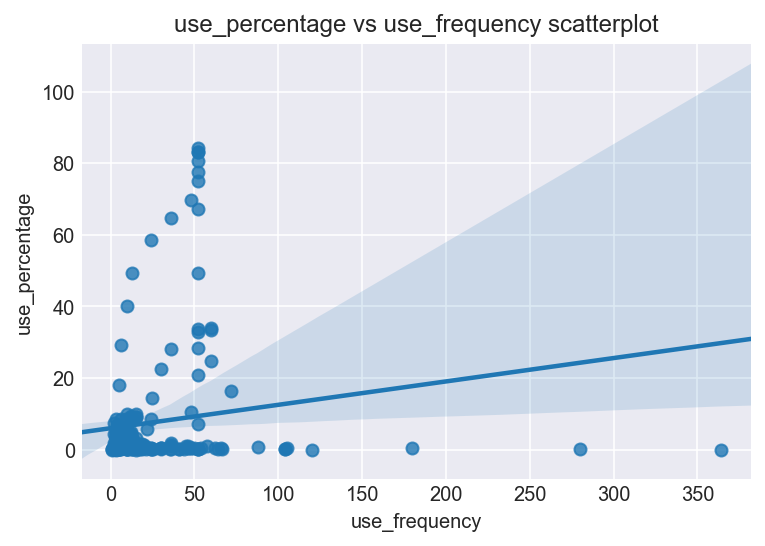

,use_frequency,use_percentage
use_frequency,1.000000,0.147195
use_percentage,0.147195,1.000000


In [125]:
# 10. Scatterplot and correlation matrix of "*-use" vs "*-freq" for the various drugs
#     - Is there a relationship between a drug's pervasiveness/popularity and addictiveness?

# 10a. Create combined long dataframe that includes both `*-use` and `*-frequency` columns:
long_use_df_renamed = long_use_df.rename(columns={"variable": "*-use", "value": "use_percentage"})
long_freq_df_renamed = long_freq_df.rename(columns={"variable": "*-frequency", "value": "use_frequency"})
long_combined_df = long_use_df_renamed.join(long_freq_df_renamed[["*-frequency", "use_frequency"]])

# 10b. Plot scatterplot:
sns.regplot(x="use_frequency", y="use_percentage", data=long_combined_df)
plt.title("use_percentage vs use_frequency scatterplot")
plt.show()

# 10c. Get correlation matrix:
long_combined_df[["use_frequency", "use_percentage"]].corr()

<span style="color:blue">
Findings #10:
-  No or only very weak positive relationship between use frequency (proxy indicator for addictiveness/dependence?) and use percentage (proxy indicator for popularity/pervasiveness?)
    -  There are other factors affecting a drug's popularity apart from how addictive it is
    -  There are other factors affecting how frequently a drug is used apart from peer pressure/social effect/how "normal" it is
</span>

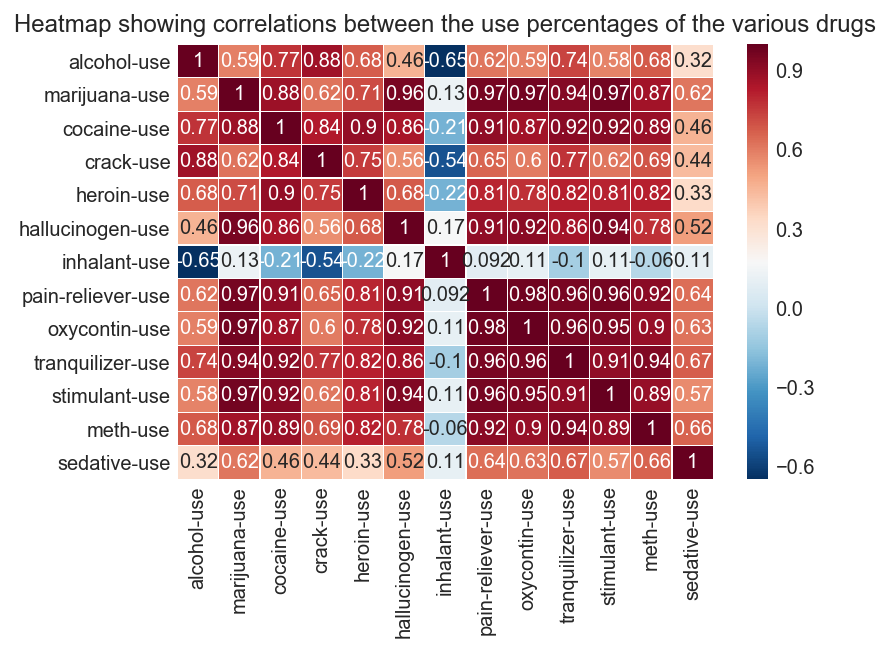

In [127]:
# 11. Heatmap for "*-use"

sns.heatmap(use_df.iloc[:, 4:].corr(), linewidths=0.1, cmap="RdBu_r", annot=True)
plt.title("Heatmap showing correlations between the use percentages of the various drugs")
plt.show()

<span style="color:blue">
Findings #11:
- Inhalant use percentage is negatively correlated with many other drug use percentages.
    -  Are inhalants (most popular amongst young age groups) a "no other options" drug/inferior good? 
    -  i.e. Do people avoid using inhalants when they have access to other drugs?
    -  Has there been a shift in attitudes/access to inhalants for younger generations?
    -  i.e. Are inhalants a trendy drug amongst youths?
- Many pairs of drugs with percentage uses that are very strongly positively correlated (r > 0.9):
    -  Heroin and cocaine
    -  Hallucinogens and alcohol
    -  Pain relievers and marijuana
    -  Pain relievers and cocaine
    -  Pain relievers and hallucinogens
    -  Oxycontin and marijuana
    -  Oxycontin and hallucinogens
    -  Oxycontin and pain relievers
    -  Tranquilizer and marijuana
    -  Tranquilizer and cocaine
    -  Tranquilizer and pain relievers
    -  Tranquilizer and oxycontin
    -  Stimulant and marijuana
    -  Stimulant and cocaine
    -  Stimulant and hallucinogens
    -  Stimulant and pain relievers
    -  Stimulant and oxycontin
    -  Meth and tranquilizers
    -  Meth and pain relievers
    -  Meth and oxycontin
    -  Meth and tranquilizers
    -  Meth and stimulants
</span>

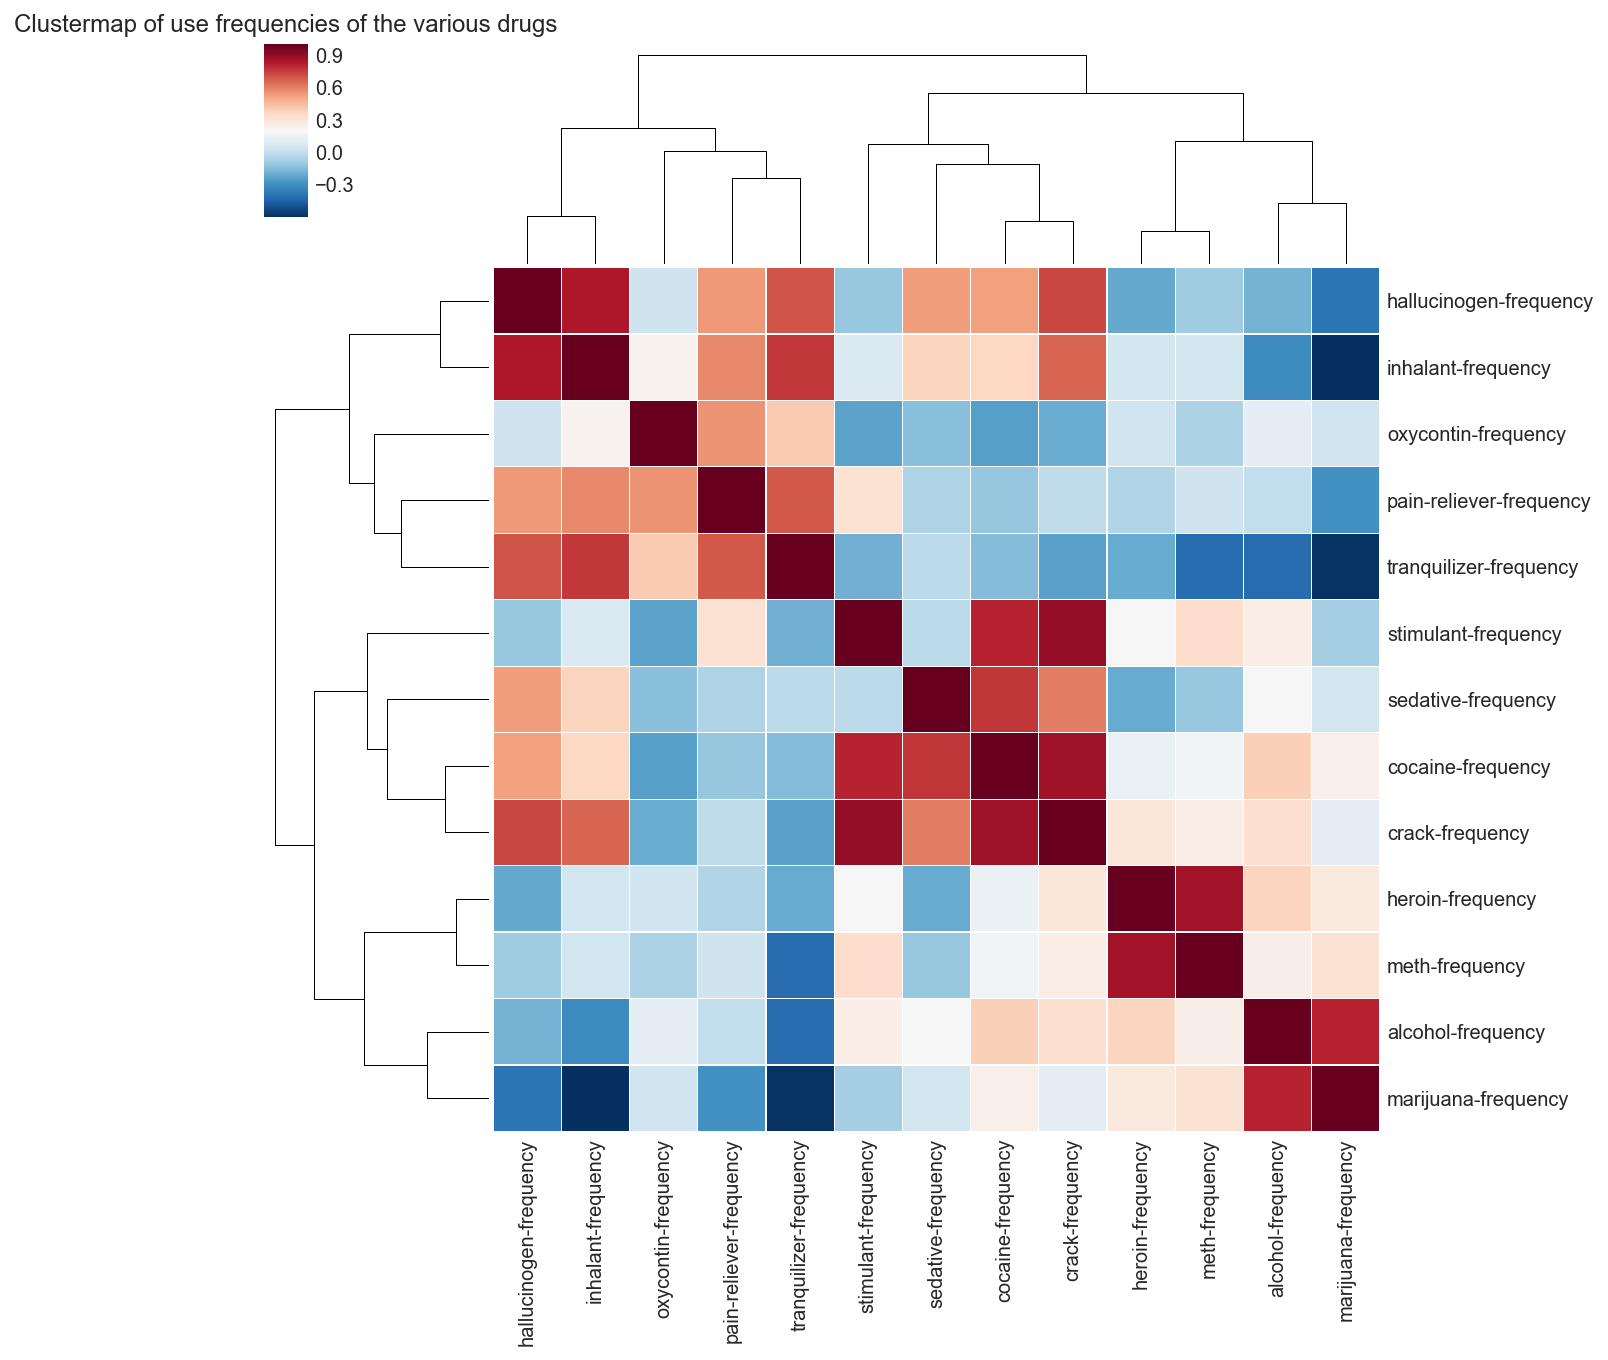

In [126]:
# 12. Clustermap for "*-freq"

sns.clustermap(freq_df.iloc[:, 4:].corr(), linewidths=0.1, cmap="RdBu_r")
plt.title("Clustermap of use frequencies of the various drugs")
plt.show()

<span style="color:blue">
Findings #12:
- Clusters:
    -  Marijuana and alcohol
    -  Meth and heroin
    -  Cocaine and crack
    -  Cocaine, crack, stimulants and sedative
    -  Pain relievers, tranquilizers and oxycontin
    -  Hallucinogens and inhalants
</span>

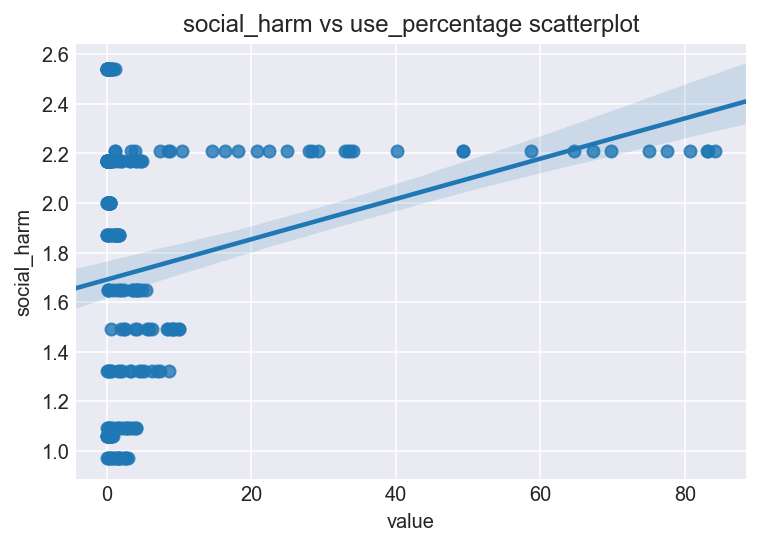

,value,social_harm
value,1.000000,0.272319
social_harm,0.272319,1.000000


In [128]:
# 13. Scatterplots and correlation matrices of "*-use" vs "social_harm", "physical_harm" and "dependence"
#     - Is there a relationship between a drug's pervasiveness/popularity and its level of harm and dependence?

# 13a. *-use" vs "social_harm"
sns.regplot(x="value", y="social_harm", data=long_use_df[["value", "social_harm"]])
plt.title("social_harm vs use_percentage scatterplot")
plt.show()

long_use_df[["value", "social_harm"]].corr()

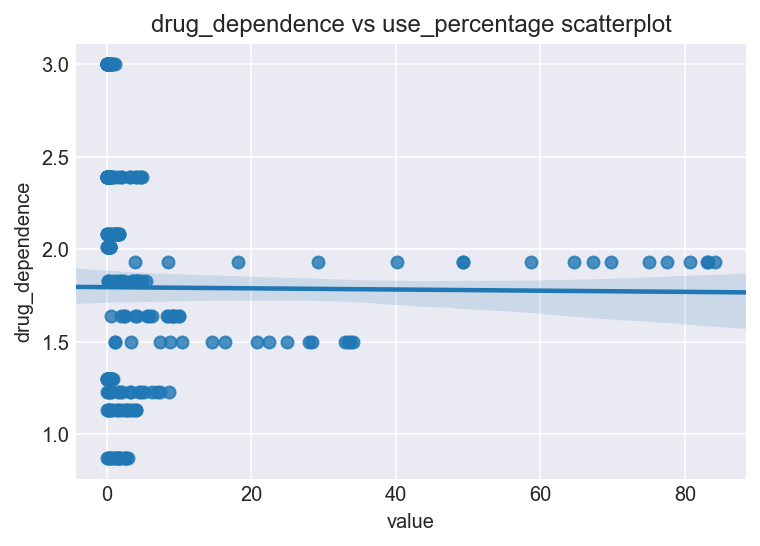

,value,drug_dependence
value,1.000000,-0.009295
drug_dependence,-0.009295,1.000000


In [129]:
# 13b. *-use" vs "dependence"
sns.regplot(x="value", y="drug_dependence", data=long_use_df[["value", "drug_dependence"]])
plt.title("drug_dependence vs use_percentage scatterplot")
plt.show()

long_use_df[["value", "drug_dependence"]].corr()

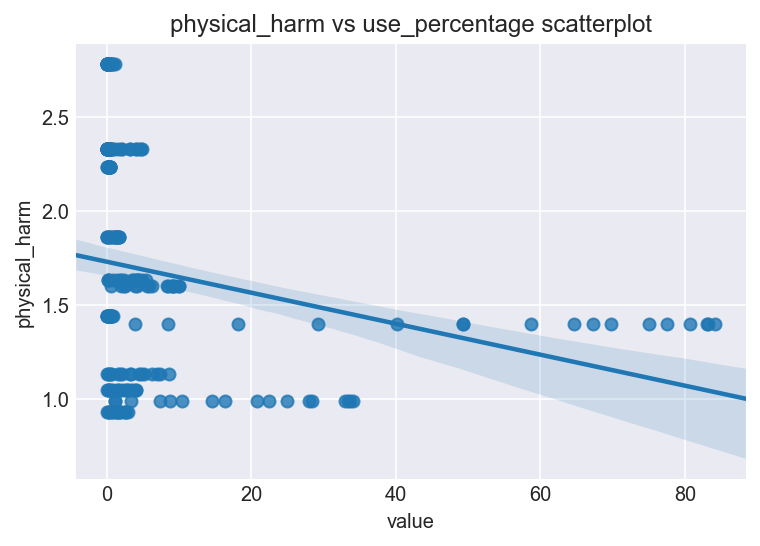

,value,physical_harm
value,1.000000,-0.240872
physical_harm,-0.240872,1.000000


In [130]:
# 13c. *-use" vs "physical_harm"
sns.regplot(x="value", y="physical_harm", data=long_use_df[["value", "physical_harm"]])
plt.title("physical_harm vs use_percentage scatterplot")
plt.show()

long_use_df[["value", "physical_harm"]].corr()

<span style="color:blue">
Findings #13:
-  No or only very weak positive relationship between use percentage (drug pervasiveness) and drug social harm level
-  No significant relationship between use percentage (drug pervasiveness) and drug dependence level (addictiveness)
-  No or only very weak negative relationship between use percentage (drug pervasiveness) and drug physical harm level
</span>

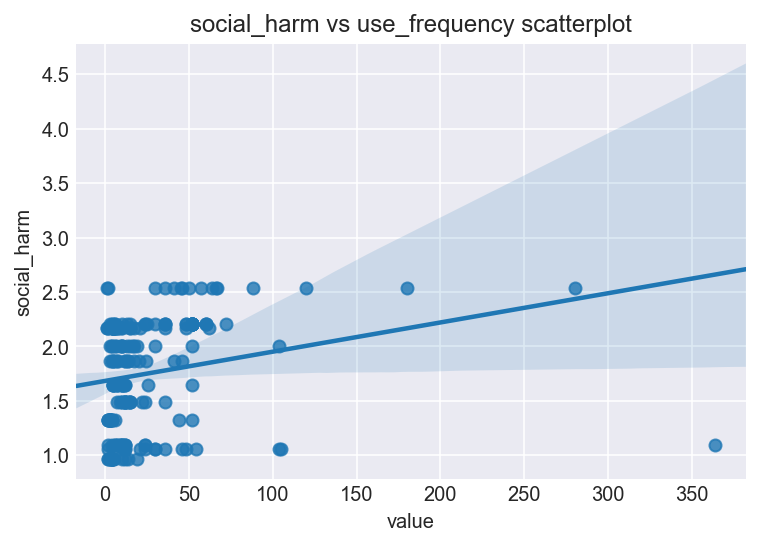

,value,social_harm
value,1.000000,0.207306
social_harm,0.207306,1.000000


In [131]:
# 14. Scatterplots and correlation matrices of "*-freq" vs "social_harm", "physical_harm" and "dependence"
#     - Is there a relationship between how frequently a drug is used and its level of harm and dependence?

# 14a. "*-freq" vs "social_harm"
sns.regplot(x="value", y="social_harm", data=long_freq_df[["value", "social_harm"]])
plt.title("social_harm vs use_frequency scatterplot")
plt.show()

long_freq_df[["value", "social_harm"]].corr()

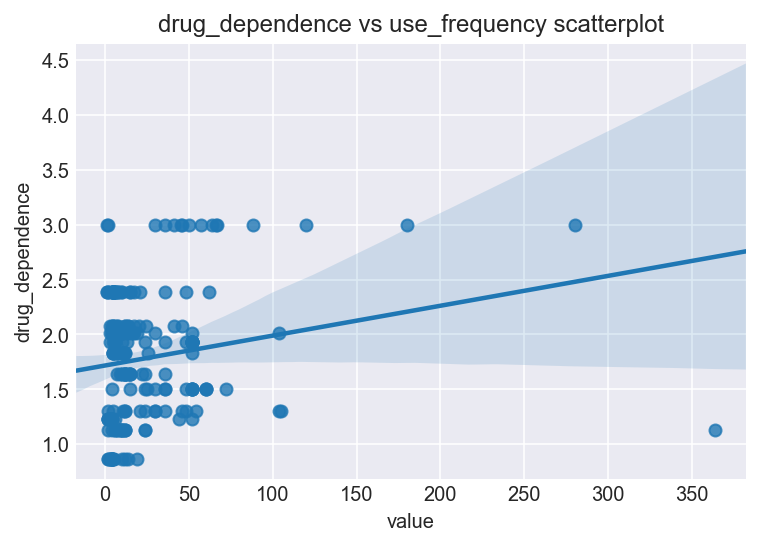

,value,drug_dependence
value,1.000000,0.183983
drug_dependence,0.183983,1.000000


In [132]:
# 14b. "*-freq" vs "dependence"
sns.regplot(x="value", y="drug_dependence", data=long_freq_df[["value", "drug_dependence"]])
plt.title("drug_dependence vs use_frequency scatterplot")
plt.show()

long_freq_df[["value", "drug_dependence"]].corr()

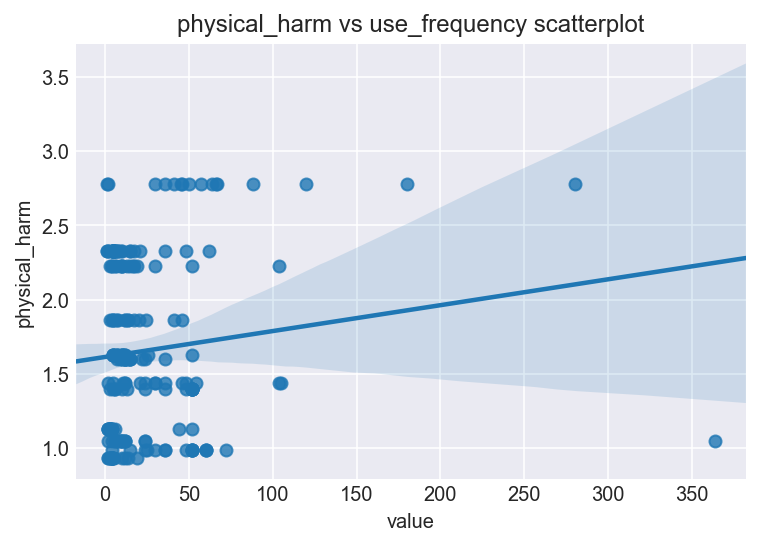

,value,physical_harm
value,1.000000,0.117586
physical_harm,0.117586,1.000000


In [133]:
# 14c. "*-freq" vs "physical_harm"
sns.regplot(x="value", y="physical_harm", data=long_freq_df[["value", "physical_harm"]])
plt.title("physical_harm vs use_frequency scatterplot")
plt.show()

long_freq_df[["value", "physical_harm"]].corr()

<span style="color:blue">
Findings #14:
-  No or only very weak positive relationship between use frequency (supposed proxy for drug addictiveness) and drug social harm level
-  Interestingly, no significant relationship between use frequency and drug dependence level (addictiveness)
    -  There are other factors apart from a drug's addictivenes that affect how frequent it used (e.g. ability to afford lifestyle)
-  No or only very weak positive relationship between use frequency and drug physical harm level
</span>

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

<span style="color:blue">
** Question and deliverables # 1: **
Is there a significant difference in the mean use percentages of cocaine and crack?
</span>

H_0: There is no significant difference between the cocaine mean use percentage and crack mean use percentage.

H_1: There is a significant difference between the cocaine mean use percentage and crack mean use percentage.

Deliverables:
-  Box plot
-  p-value

<span style="color:blue">** Question and deliverables # 2: **
Is there a significant difference in the mean use percentages of oxycontin and pain relievers?
</span>

H_0: There is no significant difference between the oxycontin mean use percentage and pain relievers mean use percentage.

H_1: There is a significant difference between the oxycontin mean use percentage and pain relievers mean use percentage.

Deliverables:
-  Box plot
-  p-value

<span style="color:blue">** Question and deliverables # 3: **
Is there a significant difference in the mean use percentages of tranquilizer and sedatives?
</span>

H_0: There is no significant difference between the tranquilizer mean use percentage and sedatives mean use percentage.

H_1: There is a significant difference between the tranquilizer mean use percentage and sedatives mean use percentage.

Deliverables:
-  Box plot
-  p-value

...

In [67]:
def conduct_t_test(variable_one, variable_two, alpha=0.05):
    distribution_one = drug_df[variable_one] - np.mean(drug_df[variable_two])
    distribution_two = drug_df[variable_two] - np.mean(drug_df[variable_two])

    results = stats.ttest_ind(distribution_one, distribution_two)

    if results.pvalue < (alpha / 2):
        print("As p-value={} is smaller than {}, we reject the null hypothesis.".format(results.pvalue, alpha / 2))
        print("There is a significant difference between the mean {} and mean {}.".format(variable_one.replace("-", " "), variable_two.replace("-", " ")))
    else:
        print("As p-value={} is greater than {}, we do not reject the null hypothesis.".format(results.pvalue, alpha / 2))

def test_mean_diff(variable_one, variable_two):
    sns.boxplot(data=drug_df[[variable_one, variable_two]])
    conduct_t_test(variable_one, variable_two, alpha=0.05)

As p-value=0.000179461894639 is smaller than 0.025, we reject the null hypothesis.
There is a significant difference between the mean cocaine use and mean crack use.


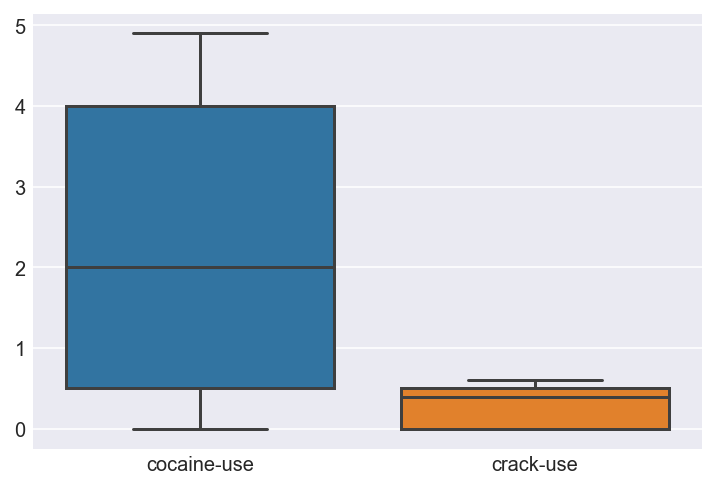

In [68]:
# Code
# ** Question and deliverables # 1**
# Is there a significant difference in the mean use percentages of cocaine and crack?

test_mean_diff("cocaine-use", "crack-use")

As p-value=1.02658782014e-07 is smaller than 0.025, we reject the null hypothesis.
There is a significant difference between the mean oxycontin use and mean pain reliever use.


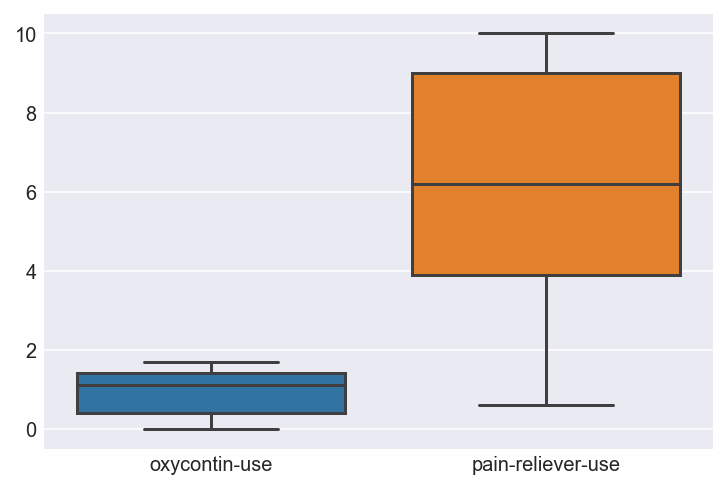

In [69]:
# Code
# ** Question and deliverables # 2**
# Is there a significant difference in the mean use percentages of oxycontin and pain relievers?

test_mean_diff('oxycontin-use','pain-reliever-use')

As p-value=1.38505611032e-06 is smaller than 0.025, we reject the null hypothesis.
There is a significant difference between the mean tranquilizer use and mean sedative use.


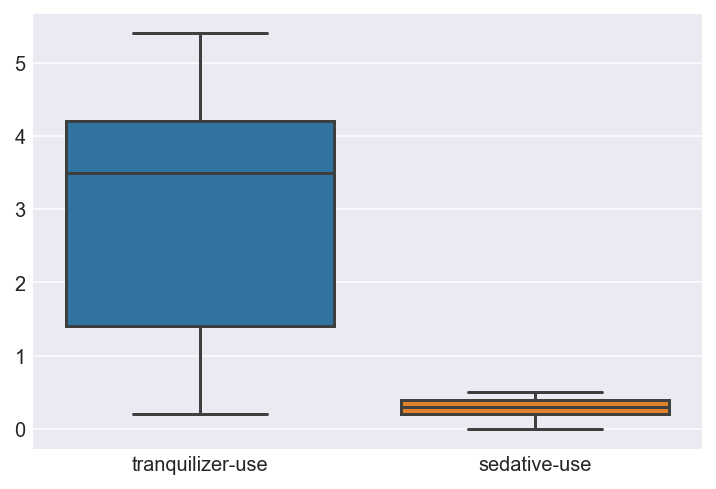

In [70]:
# ** Question and deliverables # 3**
# Is there a significant difference in the mean use percentages of tranquilizer and sedatives?

test_mean_diff('tranquilizer-use','sedative-use')

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [71]:
# Pull out the rate variable from the sat dataset:
rate = sat_df['Rate']

# Definition of outliers: 
# Points that lie below (lower quartile - 1.5IQR), or above (upper quartile + 1.5 times).
q1 = rate.quantile(0.25)
q3 = rate.quantile(0.75)
iqr = q3 - q1

print("Q1: {}, Q3: {}, IQR:{}".format(q1, q3, iqr))

# Print out outliers in dataset:
outliers_list = []
for value in rate:
    if value > (q3 + 1.5*iqr):
        outliers_list.append(value)
    elif value < (q1 - 1.5*iqr):
        outliers_list.append(value)

print(outliers_list)
# There are no outliers in the dataset.

# Hypothetical question: 
# What if there were outliers? How would the "cleaned" data without outliers differ from the original?
# If so, because the data is less skewed, the standard deviation would be lower, and the mean would be closer to the median.

Q1: 9.0, Q3: 64.0, IQR:55.0
[]


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [72]:
# 1. How does the spearman correlation compare to the pearson correlation? 
sat_df[['Verbal','Math']].corr(method='spearman')

,Verbal,Math
Verbal,1.000000,0.909413
Math,0.909413,1.000000


<span style="color:blue">
Q2. Describe clearly in words the process of calculating the spearman rank correlation.

1. Rank the values of each variable, with the largest value having rank 1.
    -  Tied scores take the value of the mean of the tied ranks. 
2. Find the numerator by summing the squares of the difference between the ranks of each variable.
3. Find the denominator, n(n^2 - 1), where n is the number of values. 
4. Spearman rank correlation = 1 - numerator/denominator
</span>

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [73]:
# 1. Convert Rate to percentiles in the sat scores as a new column.
sat_df['Rate_percentile'] = sat_df['Rate'].apply(lambda x: stats.percentileofscore(sat_df['Rate'], x))

# 1b. Check:
sat_df.head()

,State,Rate,Verbal,Math,Verbal_Math_diff,Rate_percentile
0,CT,82,509,510,-1,100.000000
1,NJ,81,499,513,-14,98.039216
2,MA,79,511,515,-4,96.078431
3,NY,77,495,505,-10,94.117647
4,NH,72,520,516,4,92.156863


In [74]:
# 2. Show the percentile of California in Rate.
sat_df[sat_df['State'] == 'CA']

,State,Rate,Verbal,Math,Verbal_Math_diff,Rate_percentile
23,CA,51,498,517,-19,55.882353


<span style="color:blue">
Q3. How is percentile related to the spearman rank correlation?
    
It is possible to rank the values in the variable by the percentile when calculating the spearman rank correlation.
</span>

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

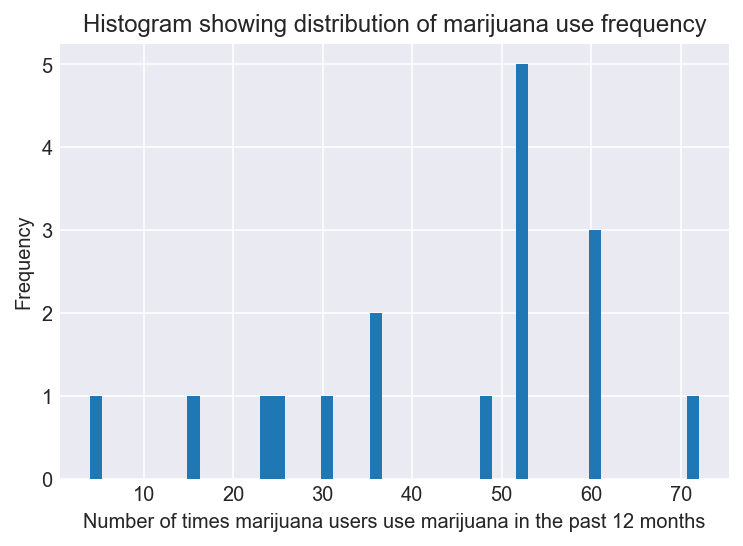

In [135]:
ax = drug_df['marijuana-frequency'].dropna().plot.hist(bins=50)
ax.set_title("Histogram showing distribution of marijuana use frequency")
ax.set_xlabel("Number of times marijuana users use marijuana in the past 12 months")
plt.show()

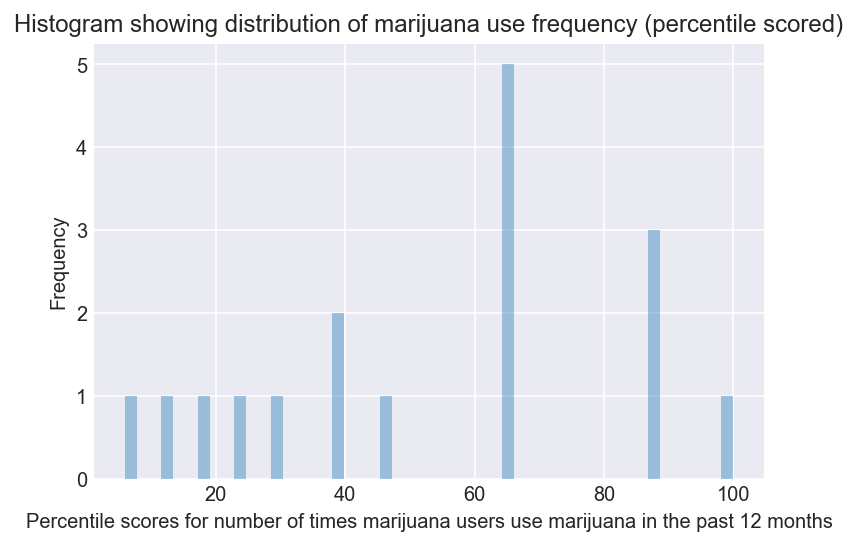

In [134]:
percentile_scores = []
for frequency in drug_df['marijuana-frequency'].dropna():
    percentile_scores.append(stats.percentileofscore(drug_df['marijuana-frequency'], frequency))

ax = sns.distplot(percentile_scores, kde=False, bins=50)
ax.set_title("Histogram showing distribution of marijuana use frequency (percentile scored)")
ax.set_xlabel("Percentile scores for number of times marijuana users use marijuana in the past 12 months")
ax.set_ylabel("Frequency")
plt.show()